In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from pathlib import Path
import os
from nltk.tokenize import RegexpTokenizer
import nltk
# from sumy.summarizers.lex_rank import LexRankSummarizer 
# #Plain text parsers since we are parsing through text
# from sumy.parsers.plaintext import PlaintextParser
# #for tokenization
# from sumy.nlp.tokenizers import Tokenizer
from nltk.tokenize.toktok import ToktokTokenizer

from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint


from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

from functions import *
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_colwidth", 200)
pd.set_option('display.expand_frame_repr', False)

In [2]:
os.chdir('/Users/ariadnavargas/Box Sync/i42 Projects/External Projects/Project ECHO/Phase 3. Execution and dissemination/ProjectECHO/')
textfile = Path("data/raw/NM COVID-19 Office Hours/")
graphs = Path("graphs/")
output = Path("outputs/")
models = Path("models/")
clean = Path("data/clean")
video1 = "2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_v2_speaker1.txt"
video2 = "2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_v2_speaker2.txt"
videoq = "2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_chat.txt"
graph1 = video1.split('.txt')[0]
graph2 = video2.split('.txt')[0]
graphq = videoq.split('.txt')[0]
topic1_s1= video1.split('.txt')[0]+'_speaker_1.html'
topic1_s2= video1.split('.txt')[0]+'_speaker_2.html'
model1_s1 = video1.split('.txt')[0]+'_speaker1.pkl'
model1_s2 = video1.split('.txt')[0]+'_speaker2.pkl'
data1= video1.split('.txt')[0]+'.csv'
data1_speaker1= video1.split('.txt')[0]+'.txt'
data1_speaker1_section1= video1.split('.txt')[0]+'_section1.txt'
data1_speaker1_section2= video1.split('.txt')[0]+'_section2.txt'
data1_speaker1_section3= video1.split('.txt')[0]+'_section3.txt'
data1_speaker2_section1= video2.split('.txt')[0]+'_section1.txt'
data1_speaker2_section2= video2.split('.txt')[0]+'_section2.txt'
data1_speaker2_section3= video2.split('.txt')[0]+'_section3.txt'

data1_speaker1_section1_key= video1.split('.txt')[0]+'_section1_key.txt'
data1_speaker1_section2_key= video1.split('.txt')[0]+'_section2_key.txt'
data1_speaker1_section3_key= video1.split('.txt')[0]+'_section3_key.txt'
data1_speaker2_section1_key= video2.split('.txt')[0]+'_section1_key.txt'
data1_speaker2_section2_key= video2.split('.txt')[0]+'_section2_key.txt'
data1_speaker2_section3_key= video2.split('.txt')[0]+'_section3_key.txt'

dataq_questions= videoq.split('.txt')[0]+'_questions.txt'
dataq_questions_key= videoq.split('.txt')[0]+'_questions_key.txt'

In [3]:
dataq_questions_key


'2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_chat_questions_key.txt'

In [4]:
graph1

'2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_v2_speaker1'

In [5]:
topic1_s1
graph2

'2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_v2_speaker2'

# Speaker 1

## Import text file

In [6]:
# Read text file into a dataframe
df = pd.read_csv(textfile/video1, sep="\t",
                 header=0,
                 names=["text", "minute"],
                 index_col=False)

In [7]:
df

,text,minute
0,"So it's going to be pretty, pretty, mostly clinical and epidemiological.",0.055167
1,"We have a lot of things to cover, but these are some of the main publication.",0.125500
2,"So the first thing was the data published in The New England Journal about the Moderna vaccine in older patients that, you know influenza and other vaccines are not as influenza vaccines and other...",0.189000
3,This publication by Moderna was was welcomed.,0.588500
4,They actually look at the data for patients 56 70 and also over 71.,0.653000
5,"And they were testing the two doses in their two protocols, the 25 microgram and a 100 microgram.",0.784500
6,And I can tell you right right off the bat that they're gonna use probably the old the higher dose for elderly patients.,0.885667
7,So the 100 microgram dose and we're going to show some of the results today.,1.023333
8,This is the basically the protocol.,1.106667
9,They have four groups.,1.162500


In [8]:
# Drop empty rows
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [9]:
df.head()

,text,minute
0,"So it's going to be pretty, pretty, mostly clinical and epidemiological.",0.055167
1,"We have a lot of things to cover, but these are some of the main publication.",0.125500
2,"So the first thing was the data published in The New England Journal about the Moderna vaccine in older patients that, you know influenza and other vaccines are not as influenza vaccines and other...",0.189000
3,This publication by Moderna was was welcomed.,0.588500
4,They actually look at the data for patients 56 70 and also over 71.,0.653000


In [10]:
# displaying the number of rows and columns 
rows = df.shape[0] 
cols = df.shape[1] 
print("Rows: " + str(rows)) 
print("Columns: " + str(cols)) 

Rows: 104
Columns: 2


In [11]:
# convert dataframe to list
temp = df.values.tolist()

# for i in temp:
#     print(i[1])

In [12]:
# text=[]
# # remove inner brackets and quotes
# for t in temp:
#     nobrackets = str(t)[1:-1]
#     stripped = nobrackets.strip('"')
#     text.append(str(stripped)[1:-1])

In [13]:
text=[]
time=[]
for i in temp:
    text.append(i[0])
    time.append(i[1])    

In [14]:
# sanity check
for i in range(10):
    print(text[i] + ' Starting time: ' + str(time[i]))

So it's going to be pretty, pretty, mostly clinical and epidemiological. Starting time: 0.0551666666666666
We have a lot of things to cover, but these are some of the main publication. Starting time: 0.1255
So the first thing was the data published in The New England Journal about the Moderna vaccine in older patients that, you know influenza and other vaccines are not as influenza vaccines and other vaccines are usually not as effective in older groups, so it's important to take a look at how the new vaccines that we are developing against COVID-19 work in older folks. Starting time: 0.189
This publication by Moderna was was welcomed. Starting time: 0.5885
They actually look at the data for patients 56 70 and also over 71. Starting time: 0.653
And they were testing the two doses in their two protocols, the 25 microgram and a 100 microgram. Starting time: 0.7845
And I can tell you right right off the bat that they're gonna use probably the old the higher dose for elderly patients. Star

In [15]:
section=[]
for i in range(len(text)):
    section.append(0)
len(section)
x=0
for i in range(len(text)):
    if 'moderna' not in text[i].lower():
        section[i]=0
        x+=1
    elif 'moderna' in text[i].lower():
        section[i]=1
        x+=1
        print(x)
        break

for i in range(x,len(text)):
    if 'prophylaxis' not in text[i].lower():
        section[i]=1
        x+=1
    elif 'prophylaxis' in text[i].lower():
        section[i]=2
        x+=1
        print(x)
        break

for i in range(x,len(text)):
    if 'covid spreads' not in text[i].lower():
        section[i]=2
        x+=1
    elif 'covid spreads' in text[i].lower():
        section[i]=3
        x+=1
        print(x)
        break

for i in range(x,len(text)):
        section[i]=3

3
37
102


In [16]:
lists = list(zip(section, text, time)) 
df = pd.DataFrame(lists, columns = ['section', 'text', 'time']) 

In [17]:
df

,section,text,time
0,0,"So it's going to be pretty, pretty, mostly clinical and epidemiological.",0.055167
1,0,"We have a lot of things to cover, but these are some of the main publication.",0.125500
2,1,"So the first thing was the data published in The New England Journal about the Moderna vaccine in older patients that, you know influenza and other vaccines are not as influenza vaccines and other...",0.189000
3,1,This publication by Moderna was was welcomed.,0.588500
4,1,They actually look at the data for patients 56 70 and also over 71.,0.653000
5,1,"And they were testing the two doses in their two protocols, the 25 microgram and a 100 microgram.",0.784500
6,1,And I can tell you right right off the bat that they're gonna use probably the old the higher dose for elderly patients.,0.885667
7,1,So the 100 microgram dose and we're going to show some of the results today.,1.023333
8,1,This is the basically the protocol.,1.106667
9,1,They have four groups.,1.162500


In [18]:
start_time = df.groupby(['section'], sort=False)['time'].max()
start_time.head()
start_time.to_csv(clean/'speaker1_sections.txt', sep='\t', index=False, header=False)

## Normalize and clean-up

### Build normalizer

In [19]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from contractions import CONTRACTION_MAP
import unicodedata
from bs4 import BeautifulSoup

nlp = spacy.load('en', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
# stopword_list.remove('no')
# stopword_list.remove('not')

# 1. Remove html tags
def strip_html_tags(text):
    soup=BeautifulSoup(text,"html.parser")
    stripped_text=soup.get_text()
    return stripped_text
strip_html_tags('<html><h2>Some important text</h2></html>')

# 2. Remove accents
def remove_accented_chars(text):    
    text=unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
remove_accented_chars('Sómê Áccèntéd téxt')

# 3. Expand contractions
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
expand_contractions("Y'all can't expand contractions I'd think")

# 4. Remove special characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, ' ', text)
    return text
remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

# 5. Lemmatization
def lemmatize_text(text):
    text=nlp(text)
    text=' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
lemmatize_text('My system keeps crashing! his crashed yesterday, ours crashes daily')

# 6. Stemming
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

# 7. Remove stopwords
def remove_stopwords(text, is_lowercase=False):
    tokens=tokenizer.tokenize(text)
    tokens=[token.strip() for token in tokens]
    if is_lowercase:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens=[token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
remove_stopwords("The, and, if are stopwords, computer is not")


', , stopwords , computer'

In [20]:
# Turn on functions as desired
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    # Run normalizer on corpus
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [21]:
df['text_clean'] = normalize_corpus(df['text'])
text_clean = list(df['text_clean'])

In [22]:
df.head(50)

,section,text,time,text_clean
0,0,"So it's going to be pretty, pretty, mostly clinical and epidemiological.",0.055167,go pretty pretty mostly clinical epidemiological
1,0,"We have a lot of things to cover, but these are some of the main publication.",0.125500,lot thing cover main publication
2,1,"So the first thing was the data published in The New England Journal about the Moderna vaccine in older patients that, you know influenza and other vaccines are not as influenza vaccines and other...",0.189000,first thing datum publish new england journal moderna vaccine old patient know influenza vaccine influenza vaccine vaccine usually effective old group important take look new vaccine develop covid...
3,1,This publication by Moderna was was welcomed.,0.588500,publication moderna welcome
4,1,They actually look at the data for patients 56 70 and also over 71.,0.653000,actually look datum patient also
5,1,"And they were testing the two doses in their two protocols, the 25 microgram and a 100 microgram.",0.784500,test two dose two protocol microgram microgram
6,1,And I can tell you right right off the bat that they're gonna use probably the old the higher dose for elderly patients.,0.885667,tell right right bat go use probably old high dose elderly patient
7,1,So the 100 microgram dose and we're going to show some of the results today.,1.023333,microgram dose go show result today
8,1,This is the basically the protocol.,1.106667,basically protocol
9,1,They have four groups.,1.162500,four group


### Tokenize

In [23]:
from spacy.tokenizer import Tokenizer
tokens = []
tokenizer = Tokenizer(nlp.vocab)


for doc in tokenizer.pipe(df['text_clean'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
#         print(token)
        doc_tokens.append(token)
    tokens.append(doc_tokens)
# Makes tokens column
df['tokens']=tokens

df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df['tokens']]

In [24]:
df.head()

,section,text,time,text_clean,tokens,tokens_back_to_text
0,0,"So it's going to be pretty, pretty, mostly clinical and epidemiological.",0.055167,go pretty pretty mostly clinical epidemiological,"[go, pretty, pretty, mostly, clinical, epidemiological]",go pretty pretty mostly clinical epidemiological
1,0,"We have a lot of things to cover, but these are some of the main publication.",0.125500,lot thing cover main publication,"[lot, thing, cover, main, publication]",lot thing cover main publication
2,1,"So the first thing was the data published in The New England Journal about the Moderna vaccine in older patients that, you know influenza and other vaccines are not as influenza vaccines and other...",0.189000,first thing datum publish new england journal moderna vaccine old patient know influenza vaccine influenza vaccine vaccine usually effective old group important take look new vaccine develop covid...,"[first, thing, datum, publish, new, england, journal, moderna, vaccine, old, patient, know, influenza, vaccine, influenza, vaccine, vaccine, usually, effective, old, group, important, take, look, ...",first thing datum publish new england journal moderna vaccine old patient know influenza vaccine influenza vaccine vaccine usually effective old group important take look new vaccine develop covid...
3,1,This publication by Moderna was was welcomed.,0.588500,publication moderna welcome,"[publication, moderna, welcome]",publication moderna welcome
4,1,They actually look at the data for patients 56 70 and also over 71.,0.653000,actually look datum patient also,"[actually, look, datum, patient, also]",actually look datum patient also


## Text mining

In [25]:
def get_trigrams(trigrams, top_grams):    
    grams_str = []
    data = []
    gram_counter = Counter(trigrams)
    for grams in gram_counter.most_common(20):
        gram = ''
        grams_str = grams[0]
        grams_str_count = []
        for n in range(0,3):
            gram = gram + grams_str[n] + ' '
        grams_str_count.append(gram)
        grams_str_count.append(grams[1])
        data.append(grams_str_count)
        print(grams_str_count)
    df = pd.DataFrame(data, columns = ['Grams', 'Count'])
    return df

def get_bigrams(bigrams, top_grams):    
    grams_str = []
    data = []

    gram_counter = Counter(bigrams)
    
    for grams in gram_counter.most_common(20):
        gram = ''
        grams_str = grams[0]
        grams_str_count = []
        for n in range(0,2):
            gram = gram + grams_str[n] + ' '
        grams_str_count.append(gram)
        grams_str_count.append(grams[1])
        data.append(grams_str_count)
        print(grams_str_count)
    df = pd.DataFrame(data, columns = ['Grams', 'Count'])
    return df


import seaborn as sns
def plot_frequency_chart(info):
#     sns.set_style("white")
    sns.set_style("ticks")
    sns.set_context("poster")
    sns.plotting_context()
    fig, ax = plt.subplots(figsize=(18, 8))
#     plt.style.use('seaborn-whitegrid')
    sns.set_context("notebook", font_scale=1)    
    ax = sns.barplot(x=info['x'], y=info['y'], data=info['data']
                     , color=(info['pal'])
                    )
    ax.yaxis.get_major_locator().set_params(integer=True)
    ax.set_title(label=info['title'], fontweight='bold', size=22)
    plt.ylabel(info['ylab'], fontsize=20)
    plt.xlabel(info['xlab'], fontsize=20)
    plt.xticks(rotation=info['angle'],fontsize=18)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig(graphs/info['fname'])
    return

nlp = spacy.load('en_core_web_lg')
# Tokenizer
# tokenizer = Tokenizer(nlp.vocab)


In [26]:
clean_text=df['tokens_back_to_text'].dropna()

big_string= ' '.join([text for text in clean_text])

exceptions_list = [ 'go ', 'pretty ', 'mostly', 'lot ', 'thing ', 
                   'cover ', 'know ', 'see ', 'also '] # pull out these words from the corpus
for word in exceptions_list:
    big_string=big_string.replace(word,'')

big_string=remove_special_characters(big_string, 
                          remove_digits=False)
    
words = big_string.split()
len(words) 

811

['vaccine seem immunogenic ', 2]
['pre exposure prophylaxis ', 2]
['young age group ', 2]
['final report remdesivir ', 2]
['clinical epidemiological main ', 1]
['epidemiological main publication ', 1]
['main publication first ', 1]
['publication first datum ', 1]
['first datum publish ', 1]
['datum publish new ', 1]
['publish new england ', 1]
['new england journal ', 1]
['england journal moderna ', 1]
['journal moderna vaccine ', 1]
['moderna vaccine old ', 1]
['vaccine old patient ', 1]
['old patient influenza ', 1]
['patient influenza vaccine ', 1]
['influenza vaccine influenza ', 1]
['vaccine influenza vaccine ', 1]


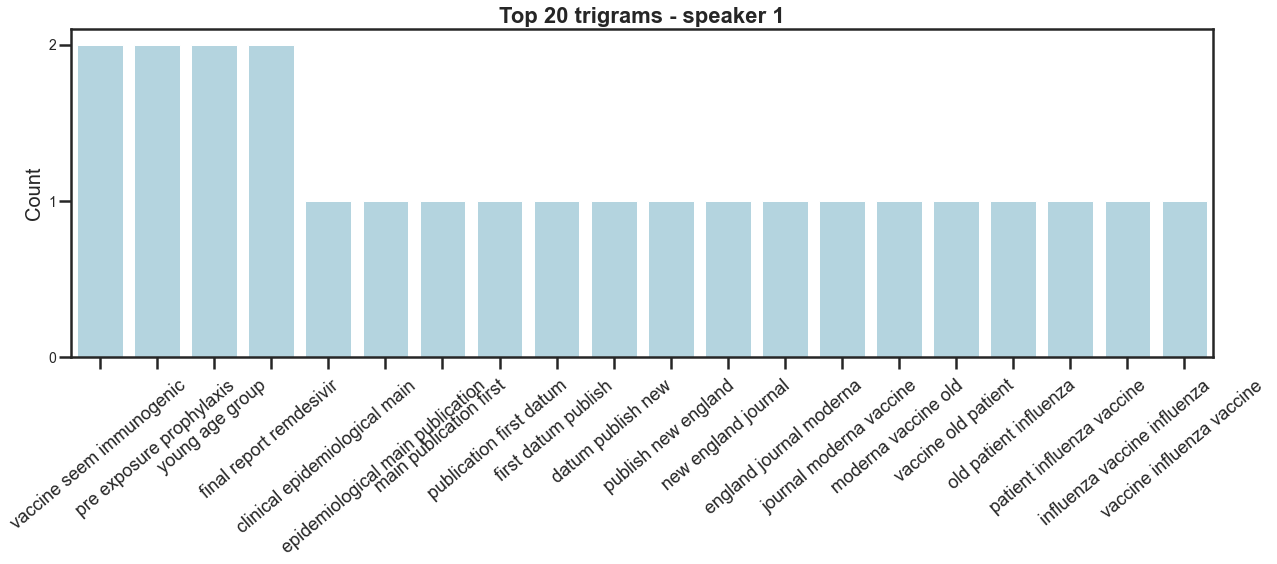

In [27]:
from collections import Counter
import matplotlib.pyplot as plt 

trigrams = nltk.trigrams(words)

df_trigrams = get_trigrams(trigrams, 10)

top25_tri = df_trigrams.iloc[:10,:]
info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count',  'pal':'lightblue',
       'title': 'Top 20 trigrams - speaker 1',
       'fname': graph1+'speaker1.png',
       'angle': 40}
plot_frequency_chart(info)

In [28]:
trigrams = nltk.trigrams(words)
df_trigrams2 = get_trigrams(trigrams, 20)
top_tri = df_trigrams2.iloc[:4,:]


['vaccine seem immunogenic ', 2]
['pre exposure prophylaxis ', 2]
['young age group ', 2]
['final report remdesivir ', 2]
['clinical epidemiological main ', 1]
['epidemiological main publication ', 1]
['main publication first ', 1]
['publication first datum ', 1]
['first datum publish ', 1]
['datum publish new ', 1]
['publish new england ', 1]
['new england journal ', 1]
['england journal moderna ', 1]
['journal moderna vaccine ', 1]
['moderna vaccine old ', 1]
['vaccine old patient ', 1]
['old patient influenza ', 1]
['patient influenza vaccine ', 1]
['influenza vaccine influenza ', 1]
['vaccine influenza vaccine ', 1]


['good news ', 5]
['high dose ', 4]
['final report ', 4]
['neutralize antibody ', 3]
['age group ', 3]
['statistically significant ', 3]
['publication first ', 2]
['moderna vaccine ', 2]
['old patient ', 2]
['influenza vaccine ', 2]
['actually look ', 2]
['group group ', 2]
['adverse event ', 2]
['across board ', 2]
['immune response ', 2]
['dose mg ', 2]
['level antibody ', 2]
['antibody young ', 2]
['vaccine seem ', 2]
['seem immunogenic ', 2]


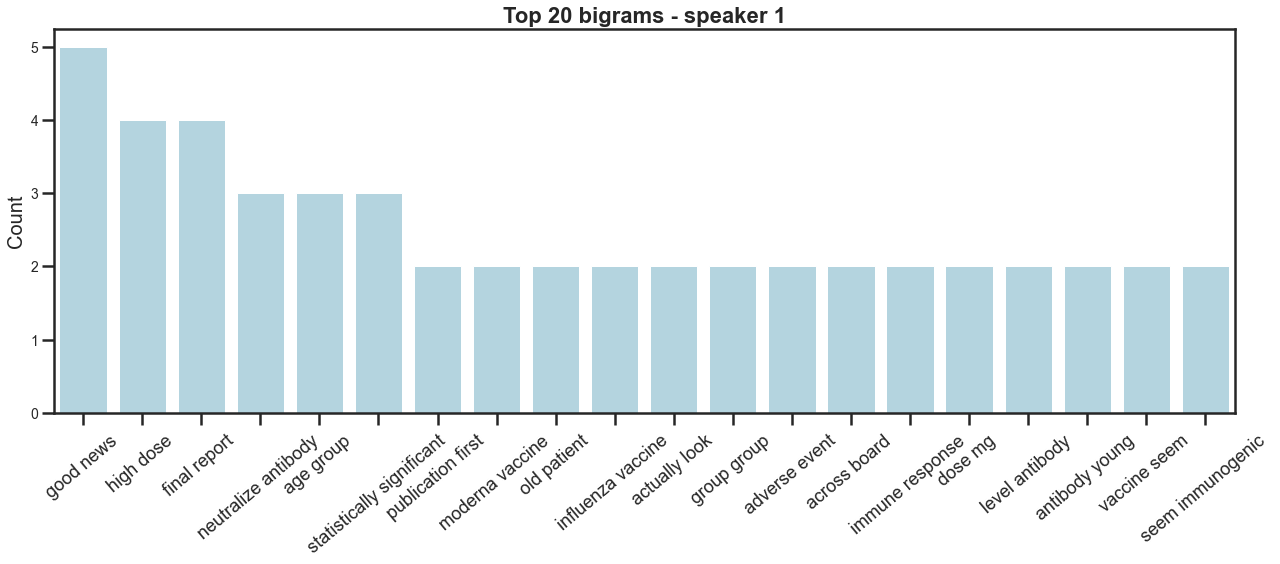

In [29]:
# import matplotlib.style as style
# style.available
# style.use('Solarize_Light2')

bigrams = nltk.bigrams(words)

df_bigrams = get_bigrams(bigrams, 10)
df_bigrams
top_tri = df_bigrams.iloc[:10,:]
info = {'data': df_bigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count', 'pal':'lightblue',
       'title': 'Top 20 bigrams - speaker 1',
       'fname': graph1+'_bigrams.png',
       'angle': 40}
plot_frequency_chart(info)

In [30]:
bigrams = nltk.trigrams(words)
df_bigrams2 = get_bigrams(bigrams, 20)
top_bi = df_bigrams2.iloc[:4,:]
top_bi

['vaccine seem ', 2]
['pre exposure ', 2]
['young age ', 2]
['final report ', 2]
['clinical epidemiological ', 1]
['epidemiological main ', 1]
['main publication ', 1]
['publication first ', 1]
['first datum ', 1]
['datum publish ', 1]
['publish new ', 1]
['new england ', 1]
['england journal ', 1]
['journal moderna ', 1]
['moderna vaccine ', 1]
['vaccine old ', 1]
['old patient ', 1]
['patient influenza ', 1]
['influenza vaccine ', 1]
['vaccine influenza ', 1]


,Grams,Count
0,vaccine seem,2
1,pre exposure,2
2,young age,2
3,final report,2


In [31]:
# import matplotlib.style as style
# style.available
# style.use('Solarize_Light2')

unigrams = Counter(words).most_common(15)
unigrams
# # df_bigrams = get_bigrams(unigrams, 10)
# # top_tri = df_bigrams.iloc[:10,:]
# info = {'data': unigrams, 'x': 'Grams', 'y': 'Count',
#        'xlab': '', 'ylab': 'Count', 'pal':'lightblue',
#        'title': 'Top 15 bigrams',
#        'fname': graph1+'.png',
#        'angle': 40}
# plot_frequency_chart(info)

[('patient', 22),
 ('day', 14),
 ('group', 12),
 ('covid', 12),
 ('one', 12),
 ('high', 11),
 ('actually', 10),
 ('dose', 10),
 ('use', 10),
 ('symptom', 10),
 ('vaccine', 9),
 ('publication', 7),
 ('old', 7),
 ('result', 7),
 ('think', 7)]

In [32]:
df

,section,text,time,text_clean,tokens,tokens_back_to_text
0,0,"So it's going to be pretty, pretty, mostly clinical and epidemiological.",0.055167,go pretty pretty mostly clinical epidemiological,"[go, pretty, pretty, mostly, clinical, epidemiological]",go pretty pretty mostly clinical epidemiological
1,0,"We have a lot of things to cover, but these are some of the main publication.",0.125500,lot thing cover main publication,"[lot, thing, cover, main, publication]",lot thing cover main publication
2,1,"So the first thing was the data published in The New England Journal about the Moderna vaccine in older patients that, you know influenza and other vaccines are not as influenza vaccines and other...",0.189000,first thing datum publish new england journal moderna vaccine old patient know influenza vaccine influenza vaccine vaccine usually effective old group important take look new vaccine develop covid...,"[first, thing, datum, publish, new, england, journal, moderna, vaccine, old, patient, know, influenza, vaccine, influenza, vaccine, vaccine, usually, effective, old, group, important, take, look, ...",first thing datum publish new england journal moderna vaccine old patient know influenza vaccine influenza vaccine vaccine usually effective old group important take look new vaccine develop covid...
3,1,This publication by Moderna was was welcomed.,0.588500,publication moderna welcome,"[publication, moderna, welcome]",publication moderna welcome
4,1,They actually look at the data for patients 56 70 and also over 71.,0.653000,actually look datum patient also,"[actually, look, datum, patient, also]",actually look datum patient also
5,1,"And they were testing the two doses in their two protocols, the 25 microgram and a 100 microgram.",0.784500,test two dose two protocol microgram microgram,"[test, two, dose, two, protocol, microgram, microgram]",test two dose two protocol microgram microgram
6,1,And I can tell you right right off the bat that they're gonna use probably the old the higher dose for elderly patients.,0.885667,tell right right bat go use probably old high dose elderly patient,"[tell, right, right, bat, go, use, probably, old, high, dose, elderly, patient]",tell right right bat go use probably old high dose elderly patient
7,1,So the 100 microgram dose and we're going to show some of the results today.,1.023333,microgram dose go show result today,"[microgram, dose, go, show, result, today]",microgram dose go show result today
8,1,This is the basically the protocol.,1.106667,basically protocol,"[basically, protocol]",basically protocol
9,1,They have four groups.,1.162500,four group,"[four, group]",four group


### Section 1

In [33]:
data1_speaker2_section1

'2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_v2_speaker2_section1.txt'

In [34]:
df_filter = df.loc[(df.section==1) ]
text = df_filter[['text']]
text

text.to_csv(clean/data1_speaker1_section1, sep='\t', index=False, header=False)

In [35]:
clean_text=df_filter['tokens_back_to_text'].dropna()

big_string= ' '.join([text for text in clean_text])

exceptions_list = [ 'go ', 'pretty ', 'mostly', 'lot ', 'thing ', 
                   'cover ', 'know ', 'see ', 'also '] # pull out these words from the corpus
for word in exceptions_list:
    big_string=big_string.replace(word,'')

big_string=remove_special_characters(big_string, 
                          remove_digits=False)
    
words = big_string.split()
len(words) 

270

['vaccine seem immunogenic ', 2]
['first datum publish ', 1]
['datum publish new ', 1]
['publish new england ', 1]
['new england journal ', 1]
['england journal moderna ', 1]
['journal moderna vaccine ', 1]
['moderna vaccine old ', 1]
['vaccine old patient ', 1]
['old patient influenza ', 1]
['patient influenza vaccine ', 1]
['influenza vaccine influenza ', 1]
['vaccine influenza vaccine ', 1]
['influenza vaccine vaccine ', 1]
['vaccine vaccine usually ', 1]
['vaccine usually effective ', 1]
['usually effective old ', 1]
['effective old group ', 1]
['old group important ', 1]
['group important take ', 1]


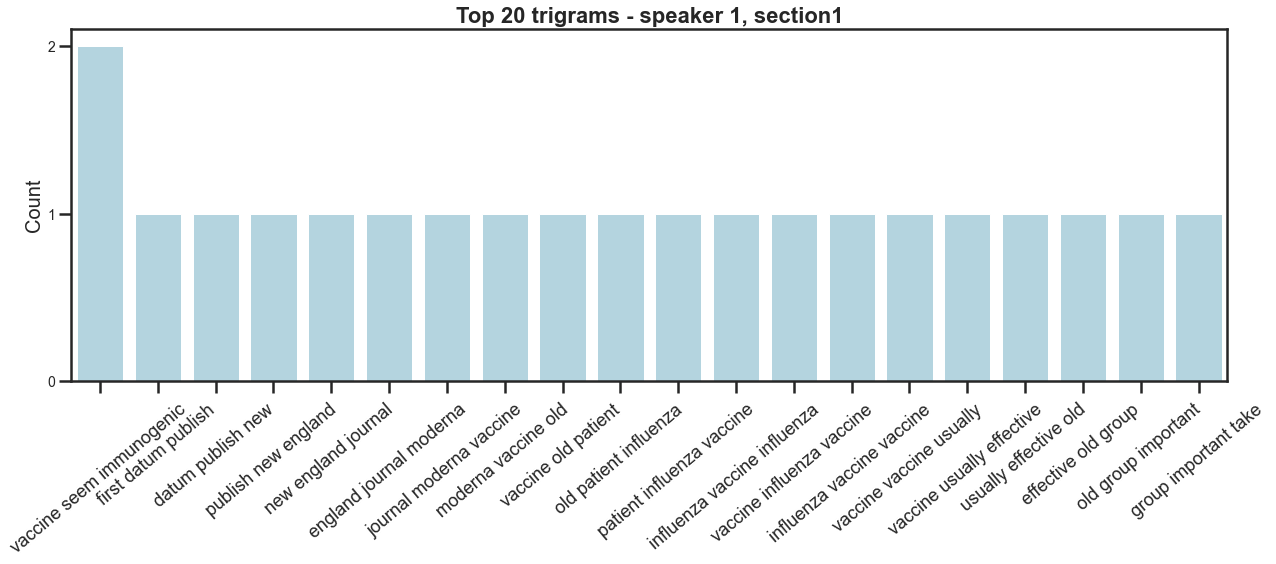

In [36]:
from collections import Counter
import matplotlib.pyplot as plt 

trigrams = nltk.trigrams(words)

df_trigrams = get_trigrams(trigrams, 10)

top25_tri = df_trigrams.iloc[:10,:]
info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count',  'pal':'lightblue',
       'title': 'Top 20 trigrams - speaker 1, section1',
       'fname': graph1+'_trigrams_section1.png',
       'angle': 40}
plot_frequency_chart(info)

In [37]:
trigrams = nltk.trigrams(words)
df_trigrams2 = get_trigrams(trigrams, 20)
top_tri = df_trigrams2.iloc[:4,:]
# top_tri
top_grams=list(top_tri['Grams'])
top_grams

['vaccine seem immunogenic ', 2]
['first datum publish ', 1]
['datum publish new ', 1]
['publish new england ', 1]
['new england journal ', 1]
['england journal moderna ', 1]
['journal moderna vaccine ', 1]
['moderna vaccine old ', 1]
['vaccine old patient ', 1]
['old patient influenza ', 1]
['patient influenza vaccine ', 1]
['influenza vaccine influenza ', 1]
['vaccine influenza vaccine ', 1]
['influenza vaccine vaccine ', 1]
['vaccine vaccine usually ', 1]
['vaccine usually effective ', 1]
['usually effective old ', 1]
['effective old group ', 1]
['old group important ', 1]
['group important take ', 1]


['vaccine seem immunogenic ',
 'first datum publish ',
 'datum publish new ',
 'publish new england ']

['high dose ', 4]
['neutralize antibody ', 3]
['good news ', 3]
['moderna vaccine ', 2]
['old patient ', 2]
['influenza vaccine ', 2]
['adverse event ', 2]
['immune response ', 2]
['dose mg ', 2]
['level antibody ', 2]
['antibody young ', 2]
['vaccine seem ', 2]
['seem immunogenic ', 2]
['first datum ', 1]
['datum publish ', 1]
['publish new ', 1]
['new england ', 1]
['england journal ', 1]
['journal moderna ', 1]
['vaccine old ', 1]


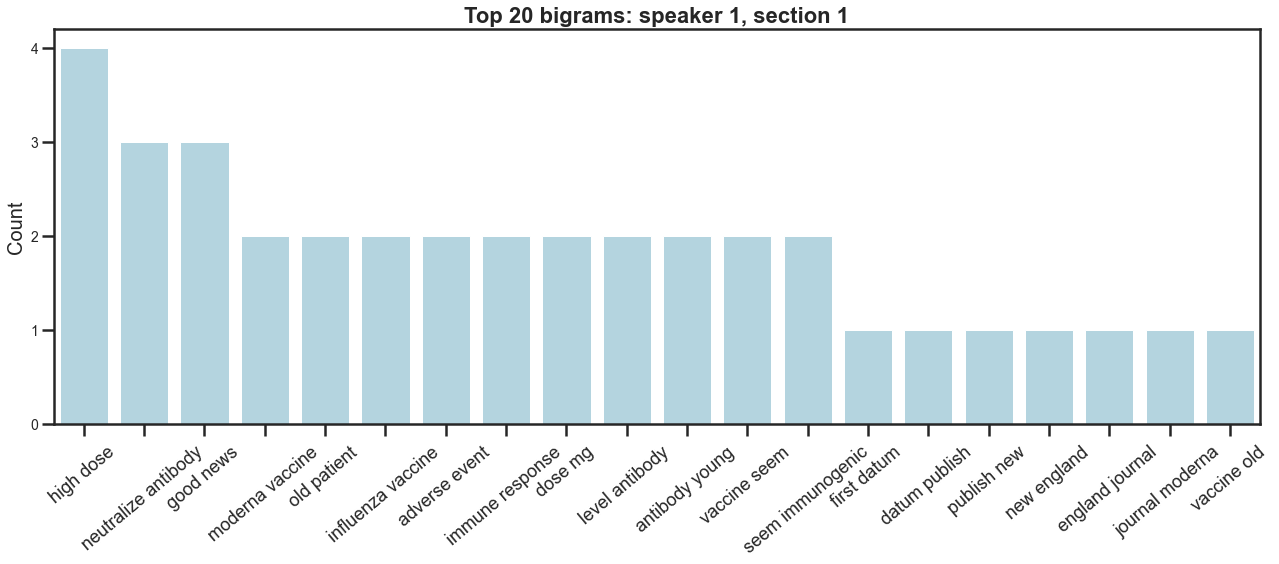

In [38]:
# import matplotlib.style as style
# style.available
# style.use('Solarize_Light2')

bigrams = nltk.bigrams(words)

df_bigrams = get_bigrams(bigrams, 10)
df_bigrams
top_tri = df_bigrams.iloc[:10,:]
info = {'data': df_bigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count', 'pal':'lightblue',
       'title': 'Top 20 bigrams: speaker 1, section 1',
       'fname': graph1+'_bigrams_section1.png',
       'angle': 40}
plot_frequency_chart(info)

In [39]:
bigrams = nltk.bigrams(words)
df_bigrams2 = get_bigrams(bigrams, 20)
top_bi = df_bigrams2.iloc[:4,:]
# top_tri
top_bi_list=(list(top_bi['Grams']))
for i in top_bi_list:
    top_grams.append(i)
top_grams    

['high dose ', 4]
['neutralize antibody ', 3]
['good news ', 3]
['moderna vaccine ', 2]
['old patient ', 2]
['influenza vaccine ', 2]
['adverse event ', 2]
['immune response ', 2]
['dose mg ', 2]
['level antibody ', 2]
['antibody young ', 2]
['vaccine seem ', 2]
['seem immunogenic ', 2]
['first datum ', 1]
['datum publish ', 1]
['publish new ', 1]
['new england ', 1]
['england journal ', 1]
['journal moderna ', 1]
['vaccine old ', 1]


['vaccine seem immunogenic ',
 'first datum publish ',
 'datum publish new ',
 'publish new england ',
 'high dose ',
 'neutralize antibody ',
 'good news ',
 'moderna vaccine ']

In [40]:
unigrams = Counter(words).most_common(15)
unigrams

[('dose', 10),
 ('vaccine', 9),
 ('patient', 8),
 ('group', 8),
 ('old', 7),
 ('response', 7),
 ('antibody', 6),
 ('use', 5),
 ('high', 5),
 ('one', 5),
 ('moderna', 4),
 ('important', 4),
 ('microgram', 4),
 ('young', 4),
 ('good', 4)]

In [41]:
for i in range(6):
    top_grams.append(unigrams[i][0])

In [42]:
top_grams

['vaccine seem immunogenic ',
 'first datum publish ',
 'datum publish new ',
 'publish new england ',
 'high dose ',
 'neutralize antibody ',
 'good news ',
 'moderna vaccine ',
 'dose',
 'vaccine',
 'patient',
 'group',
 'old',
 'response']

In [43]:
grams=[]
for i in top_grams:
    x = i.replace("datum", "data")
    grams.append(x)
grams    

['vaccine seem immunogenic ',
 'first data publish ',
 'data publish new ',
 'publish new england ',
 'high dose ',
 'neutralize antibody ',
 'good news ',
 'moderna vaccine ',
 'dose',
 'vaccine',
 'patient',
 'group',
 'old',
 'response']

In [44]:
f=open(clean/data1_speaker1_section1_key,'w')
for ele in grams:
    f.write('#'+ele+' ')

f.close()

### Section 2

In [45]:
df_filter = df.loc[(df.section==2) ]
text = df_filter[['text']]
text

text.to_csv(clean/data1_speaker1_section2, sep='\t', index=False, header=False)

In [46]:
clean_text=df_filter['tokens_back_to_text'].dropna()

big_string= ' '.join([text for text in clean_text])

exceptions_list = [ 'go ', 'pretty ', 'mostly', 'lot ', 'thing ', 
                   'cover ', 'know ', 'see ', 'also ', 'still ', 'somewhat ',
                  'actually '] # pull out these words from the corpus
for word in exceptions_list:
    big_string=big_string.replace(word,'')

big_string=remove_special_characters(big_string, 
                          remove_digits=False)
    
words = big_string.split()
len(words) 

509

['pre exposure prophylaxis ', 2]
['young age group ', 2]
['final report remdesivir ', 2]
['think area debatable ', 1]
['area debatable hydroxychloroquine ', 1]
['debatable hydroxychloroquine use ', 1]
['hydroxychloroquine use pre ', 1]
['use pre exposure ', 1]
['exposure prophylaxis discard ', 1]
['prophylaxis discard treatment ', 1]
['discard treatment moderate ', 1]
['treatment moderate mild ', 1]
['moderate mild severe ', 1]
['mild severe covid ', 1]
['severe covid investigator ', 1]
['covid investigator think ', 1]
['investigator think use ', 1]
['think use early ', 1]
['use early enough ', 1]
['early enough may ', 1]


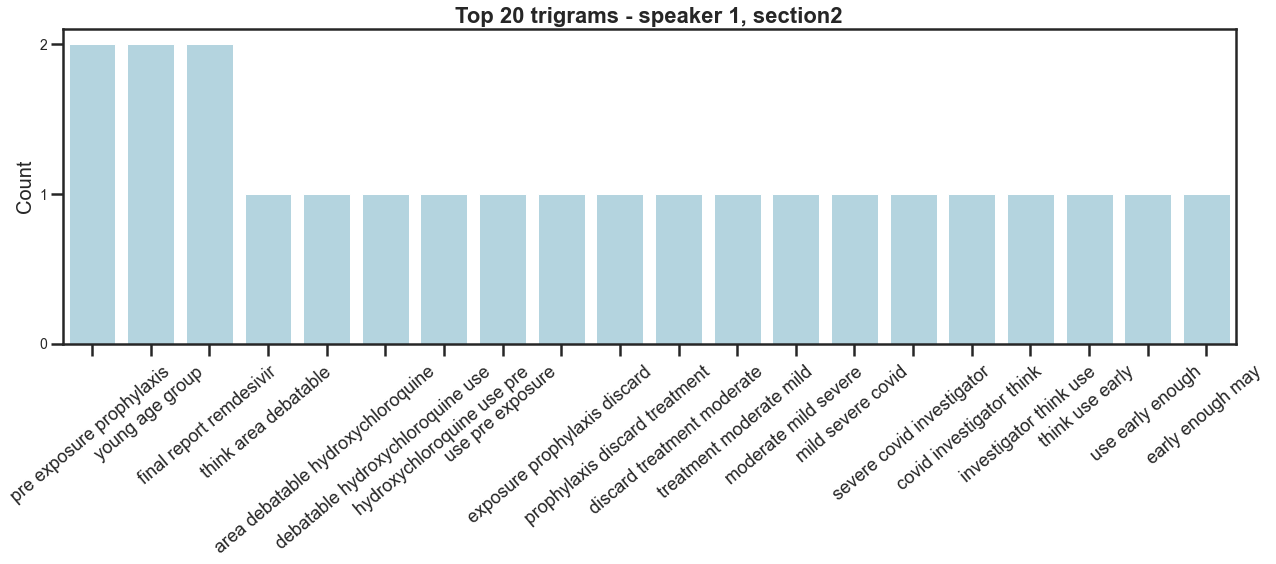

In [47]:
from collections import Counter
import matplotlib.pyplot as plt 

trigrams = nltk.trigrams(words)

df_trigrams = get_trigrams(trigrams, 10)

top25_tri = df_trigrams.iloc[:10,:]
info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count',  'pal':'lightblue',
       'title': 'Top 20 trigrams - speaker 1, section2',
       'fname': graph1+'_trigrams_section2.png',
       'angle': 40}
plot_frequency_chart(info)

In [48]:
trigrams = nltk.trigrams(words)
df_trigrams2 = get_trigrams(trigrams, 20)
top_tri = df_trigrams2.iloc[:4,:]
# top_tri
top_grams=list(top_tri['Grams'])
top_grams

['pre exposure prophylaxis ', 2]
['young age group ', 2]
['final report remdesivir ', 2]
['think area debatable ', 1]
['area debatable hydroxychloroquine ', 1]
['debatable hydroxychloroquine use ', 1]
['hydroxychloroquine use pre ', 1]
['use pre exposure ', 1]
['exposure prophylaxis discard ', 1]
['prophylaxis discard treatment ', 1]
['discard treatment moderate ', 1]
['treatment moderate mild ', 1]
['moderate mild severe ', 1]
['mild severe covid ', 1]
['severe covid investigator ', 1]
['covid investigator think ', 1]
['investigator think use ', 1]
['think use early ', 1]
['use early enough ', 1]
['early enough may ', 1]


['pre exposure prophylaxis ',
 'young age group ',
 'final report remdesivir ',
 'think area debatable ']

['final report ', 4]
['statistically significant ', 3]
['pre exposure ', 2]
['exposure prophylaxis ', 2]
['severe covid ', 2]
['study hydroxychloroquine ', 2]
['take hydroxychloroquine ', 2]
['another another ', 2]
['good news ', 2]
['long covid ', 2]
['covid find ', 2]
['critical covid ', 2]
['non critical ', 2]
['day like ', 2]
['two third ', 2]
['persistent symptom ', 2]
['young age ', 2]
['age group ', 2]
['severe disease ', 2]
['odd ratio ', 2]


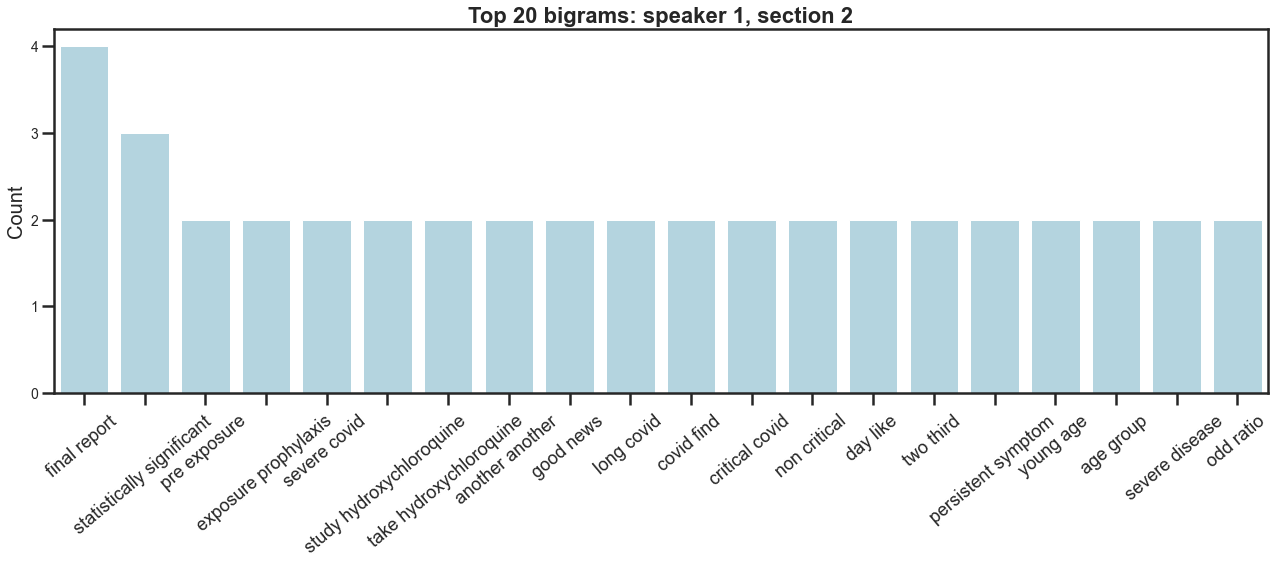

In [49]:
# import matplotlib.style as style
# style.available
# style.use('Solarize_Light2')

bigrams = nltk.bigrams(words)

df_bigrams = get_bigrams(bigrams, 10)
df_bigrams
top_tri = df_bigrams.iloc[:10,:]
info = {'data': df_bigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count', 'pal':'lightblue',
       'title': 'Top 20 bigrams: speaker 1, section 2',
       'fname': graph1+'_bigrams_section2.png',
       'angle': 40}
plot_frequency_chart(info)

In [50]:
bigrams = nltk.bigrams(words)
df_bigrams2 = get_bigrams(bigrams, 20)
top_bi = df_bigrams2.iloc[:4,:]
# top_tri
top_bi_list=(list(top_bi['Grams']))
for i in top_bi_list:
    top_grams.append(i)
top_grams

['final report ', 4]
['statistically significant ', 3]
['pre exposure ', 2]
['exposure prophylaxis ', 2]
['severe covid ', 2]
['study hydroxychloroquine ', 2]
['take hydroxychloroquine ', 2]
['another another ', 2]
['good news ', 2]
['long covid ', 2]
['covid find ', 2]
['critical covid ', 2]
['non critical ', 2]
['day like ', 2]
['two third ', 2]
['persistent symptom ', 2]
['young age ', 2]
['age group ', 2]
['severe disease ', 2]
['odd ratio ', 2]


['pre exposure prophylaxis ',
 'young age group ',
 'final report remdesivir ',
 'think area debatable ',
 'final report ',
 'statistically significant ',
 'pre exposure ',
 'exposure prophylaxis ']

In [51]:
unigrams = Counter(words).most_common(15)
unigrams

[('patient', 14),
 ('day', 14),
 ('covid', 10),
 ('symptom', 10),
 ('report', 7),
 ('hydroxychloroquine', 6),
 ('high', 6),
 ('one', 6),
 ('remdesivir', 6),
 ('think', 5),
 ('use', 5),
 ('case', 5),
 ('trial', 5),
 ('result', 5),
 ('interesting', 5)]

In [52]:
for i in range(6):
    top_grams.append(unigrams[i][0])

In [53]:
top_grams

['pre exposure prophylaxis ',
 'young age group ',
 'final report remdesivir ',
 'think area debatable ',
 'final report ',
 'statistically significant ',
 'pre exposure ',
 'exposure prophylaxis ',
 'patient',
 'day',
 'covid',
 'symptom',
 'report',
 'hydroxychloroquine']

In [54]:
grams=[]
for i in top_grams:
    x = i.replace("datum", "data")
    grams.append(x)
grams    

['pre exposure prophylaxis ',
 'young age group ',
 'final report remdesivir ',
 'think area debatable ',
 'final report ',
 'statistically significant ',
 'pre exposure ',
 'exposure prophylaxis ',
 'patient',
 'day',
 'covid',
 'symptom',
 'report',
 'hydroxychloroquine']

In [55]:
f=open(clean/data1_speaker1_section2_key,'w')
for ele in grams:
    f.write('#'+ele+' ')

f.close()

### Section 3

In [56]:
df_filter = df.loc[(df.section==3) ]
text = df_filter[['text']]
text

text.to_csv(clean/data1_speaker1_section3, sep='\t', index=False, header=False)

In [57]:
clean_text=df_filter['tokens_back_to_text'].dropna()

big_string= ' '.join([text for text in clean_text])

exceptions_list = [ 'go ', 'pretty ', 'mostly', 'lot ', 'thing ', 
                   'cover ', 'know ', 'see ', 'also ', 'still ', 'somewhat ',
                  'finally', 'make', 'final '] # pull out these words from the corpus
for word in exceptions_list:
    big_string=big_string.replace(word,'')

big_string=remove_special_characters(big_string, 
                          remove_digits=False)
    
words = big_string.split()
len(words) 

14

['statement cancel time ', 1]
['cancel time spread ', 1]
['time spread airborne ', 1]
['spread airborne transmission ', 1]
['airborne transmission covid ', 1]
['transmission covid spread ', 1]
['covid spread cdc ', 1]
['spread cdc webpage ', 1]
['cdc webpage think ', 1]
['webpage think last ', 1]
['think last one ', 1]
['last one thank ', 1]


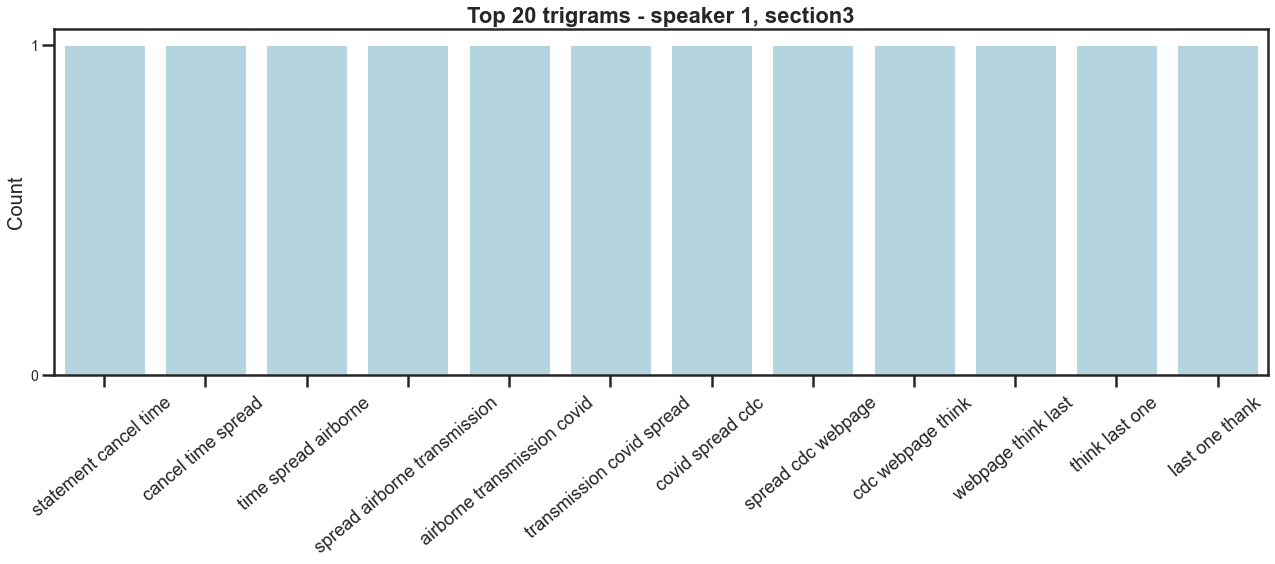

In [58]:
from collections import Counter
import matplotlib.pyplot as plt 

trigrams = nltk.trigrams(words)

df_trigrams = get_trigrams(trigrams, 10)

top25_tri = df_trigrams.iloc[:10,:]
info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count',  'pal':'lightblue',
       'title': 'Top 20 trigrams - speaker 1, section3',
       'fname': graph1+'_trigrams_section3.png',
       'angle': 40}
plot_frequency_chart(info)

In [59]:
trigrams = nltk.trigrams(words)
df_trigrams2 = get_trigrams(trigrams, 20)
top_tri = df_trigrams2.iloc[:4,:]
# top_tri
top_grams=list(top_tri['Grams'])
top_grams

['statement cancel time ', 1]
['cancel time spread ', 1]
['time spread airborne ', 1]
['spread airborne transmission ', 1]
['airborne transmission covid ', 1]
['transmission covid spread ', 1]
['covid spread cdc ', 1]
['spread cdc webpage ', 1]
['cdc webpage think ', 1]
['webpage think last ', 1]
['think last one ', 1]
['last one thank ', 1]


['statement cancel time ',
 'cancel time spread ',
 'time spread airborne ',
 'spread airborne transmission ']

['statement cancel ', 1]
['cancel time ', 1]
['time spread ', 1]
['spread airborne ', 1]
['airborne transmission ', 1]
['transmission covid ', 1]
['covid spread ', 1]
['spread cdc ', 1]
['cdc webpage ', 1]
['webpage think ', 1]
['think last ', 1]
['last one ', 1]
['one thank ', 1]


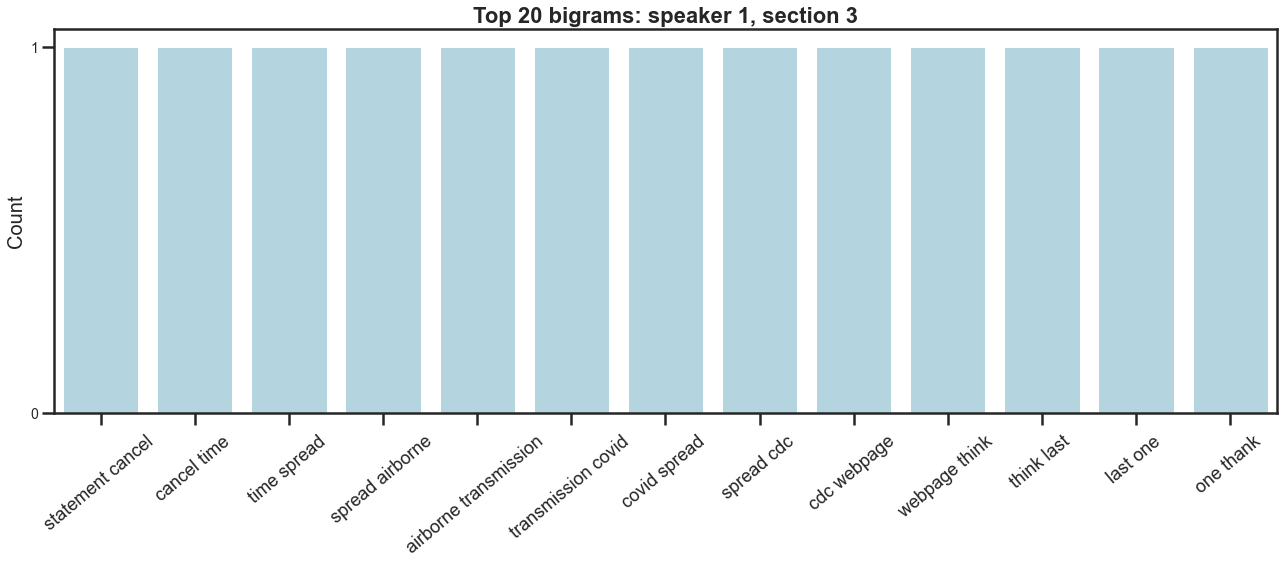

In [60]:
# import matplotlib.style as style
# style.available
# style.use('Solarize_Light2')

bigrams = nltk.bigrams(words)

df_bigrams = get_bigrams(bigrams, 10)
df_bigrams
top_tri = df_bigrams.iloc[:10,:]
info = {'data': df_bigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count', 'pal':'lightblue',
       'title': 'Top 20 bigrams: speaker 1, section 3',
       'fname': graph1+'_bigrams_section3.png',
       'angle': 40}
plot_frequency_chart(info)

In [61]:
bigrams = nltk.bigrams(words)
df_bigrams2 = get_bigrams(bigrams, 20)
top_bi = df_bigrams2.iloc[:4,:]
# top_tri
top_bi_list=(list(top_bi['Grams']))
for i in top_bi_list:
    top_grams.append(i)
top_grams

['statement cancel ', 1]
['cancel time ', 1]
['time spread ', 1]
['spread airborne ', 1]
['airborne transmission ', 1]
['transmission covid ', 1]
['covid spread ', 1]
['spread cdc ', 1]
['cdc webpage ', 1]
['webpage think ', 1]
['think last ', 1]
['last one ', 1]
['one thank ', 1]


['statement cancel time ',
 'cancel time spread ',
 'time spread airborne ',
 'spread airborne transmission ',
 'statement cancel ',
 'cancel time ',
 'time spread ',
 'spread airborne ']

In [62]:
unigrams = Counter(words).most_common(15)
unigrams

[('spread', 2),
 ('statement', 1),
 ('cancel', 1),
 ('time', 1),
 ('airborne', 1),
 ('transmission', 1),
 ('covid', 1),
 ('cdc', 1),
 ('webpage', 1),
 ('think', 1),
 ('last', 1),
 ('one', 1),
 ('thank', 1)]

In [63]:
for i in range(6):
    top_grams.append(unigrams[i][0])

In [64]:
top_grams

['statement cancel time ',
 'cancel time spread ',
 'time spread airborne ',
 'spread airborne transmission ',
 'statement cancel ',
 'cancel time ',
 'time spread ',
 'spread airborne ',
 'spread',
 'statement',
 'cancel',
 'time',
 'airborne',
 'transmission']

In [65]:
grams=[]
for i in top_grams:
    x = i.replace("datum", "data")
    grams.append(x)
grams    

['statement cancel time ',
 'cancel time spread ',
 'time spread airborne ',
 'spread airborne transmission ',
 'statement cancel ',
 'cancel time ',
 'time spread ',
 'spread airborne ',
 'spread',
 'statement',
 'cancel',
 'time',
 'airborne',
 'transmission']

In [66]:
f=open(clean/data1_speaker1_section3_key,'w')
for ele in grams:
    f.write('#'+ele+' ')

f.close()

# Speaker 2

## Import text file

In [67]:
# video1 = "2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_v2_speaker2.txt"
video2

'2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_v2_speaker2.txt'

In [68]:
# Read text file into a dataframe
df = pd.read_csv(textfile/video2, sep="\t",
                 header=0,
                 names=["text", "minute"],
                 index_col=False)

In [69]:
df

,text,minute
0,It's from JAMA.,15.642833
1,And it was on the science of persuasion.,15.660000
2,"How you can, um I guess there's actually been a lot of studies on How do you persuade people to do things and, um, opportune lessons for COVID-19 prevention.",15.694000
3,"So they talked about the five habit promoting strategies which, um, if you want somebody to develop a habit, get exercising or, um, eating more vegetables or wearing a mask.",15.835667
4,They said there's five things to do.,16.033667
5,You want to make it easy to start and easy to repeat.,16.054500
6,"You wanna make it rewarding to repeat, you want to tie the behavior to an existing habit.",16.108167
7,"And I know I do this with people all the time suggesting they take pills when they first like that, and talk about behaviors that conflict with existing habits and provide alternative behaviors an...",16.178833
8,"Repeat, making handwashing stations and hand sanitizer available everywhere really makes a difference on how often people wash their hands, and you know it's obvious.",16.488167
9,"But, um, often we don't have hand sanitizer readily available, so making it readily available.",16.633833


In [70]:
# Drop empty rows
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [71]:
df.head()

,text,minute
0,It's from JAMA.,15.642833
1,And it was on the science of persuasion.,15.660000
2,"How you can, um I guess there's actually been a lot of studies on How do you persuade people to do things and, um, opportune lessons for COVID-19 prevention.",15.694000
3,"So they talked about the five habit promoting strategies which, um, if you want somebody to develop a habit, get exercising or, um, eating more vegetables or wearing a mask.",15.835667
4,They said there's five things to do.,16.033667


In [72]:
# displaying the number of rows and columns 
rows = df.shape[0] 
cols = df.shape[1] 
print("Rows: " + str(rows)) 
print("Columns: " + str(cols)) 

Rows: 53
Columns: 2


In [73]:
# convert dataframe to list
temp = df.values.tolist()

# for i in temp:
#     print(i[1])

In [74]:
# text=[]
# # remove inner brackets and quotes
# for t in temp:
#     nobrackets = str(t)[1:-1]
#     stripped = nobrackets.strip('"')
#     text.append(str(stripped)[1:-1])

In [75]:
text=[]
time=[]
for i in temp:
    text.append(i[0])
    time.append(i[1])    

In [76]:
# sanity check
for i in range(10):
    print(text[i] + ' Starting time: ' + str(time[i]))

It's from JAMA. Starting time: 15.642833333333334
And it was on the science of persuasion. Starting time: 15.66
How you can, um I guess there's actually been a lot of studies on How do you persuade people to do things and, um, opportune lessons for COVID-19 prevention. Starting time: 15.694
So they talked about the five habit promoting strategies which, um, if you want somebody to develop a habit, get exercising or, um, eating more vegetables or wearing a mask. Starting time: 15.835666666666668
They said there's five things to do. Starting time: 16.033666666666665
You want to make it easy to start and easy to repeat. Starting time: 16.0545
You wanna make it rewarding to repeat, you want to tie the behavior to an existing habit. Starting time: 16.108166666666666
And I know I do this with people all the time suggesting they take pills when they first like that, and talk about behaviors that conflict with existing habits and provide alternative behaviors and provide specific descriptions 

In [77]:
section=[]
for i in range(len(text)):
    section.append(0)
len(section)
x=0
for i in range(len(text)):
    if 'science of persuasion' not in text[i].lower():
        section[i]=0
        x+=1
    elif 'science of persuasion' in text[i].lower():
        section[i]=1
        x+=1
        print(x)
        break

for i in range(x,len(text)):
    if 'cause of death' not in text[i].lower():
        section[i]=1
        x+=1
    elif 'cause of death' in text[i].lower():
        section[i]=2
        x+=1
        print(x)
        break

for i in range(x,len(text)):
    if 'facebook' not in text[i].lower():
        section[i]=2
        x+=1
    elif 'facebook' in text[i].lower():
        section[i]=3
        x+=1
        print(x)
        break    


for i in range(x,len(text)):
        section[i]=3

2
24
40


In [78]:
for i in range(len(text)):
    print(text[i])

It's from JAMA.
And it was on the science of persuasion.
How you can, um I guess there's actually been a lot of studies on How do you persuade people to do things and, um, opportune lessons for COVID-19 prevention.
So they talked about the five habit promoting strategies which, um, if you want somebody to develop a habit, get exercising or, um, eating more vegetables or wearing a mask.
They said there's five things to do.
You want to make it easy to start and easy to repeat.
You wanna make it rewarding to repeat, you want to tie the behavior to an existing habit.
And I know I do this with people all the time suggesting they take pills when they first like that, and talk about behaviors that conflict with existing habits and provide alternative behaviors and provide specific descriptions of desire behaviors and they discussed for, um, the first one of making the behavior easy to start.
Repeat, making handwashing stations and hand sanitizer available everywhere really makes a difference 

In [79]:
lists = list(zip(section, text, time)) 
df = pd.DataFrame(lists, columns = ['section', 'text', 'time']) 

In [80]:
df

,section,text,time
0,0,It's from JAMA.,15.642833
1,1,And it was on the science of persuasion.,15.660000
2,1,"How you can, um I guess there's actually been a lot of studies on How do you persuade people to do things and, um, opportune lessons for COVID-19 prevention.",15.694000
3,1,"So they talked about the five habit promoting strategies which, um, if you want somebody to develop a habit, get exercising or, um, eating more vegetables or wearing a mask.",15.835667
4,1,They said there's five things to do.,16.033667
5,1,You want to make it easy to start and easy to repeat.,16.054500
6,1,"You wanna make it rewarding to repeat, you want to tie the behavior to an existing habit.",16.108167
7,1,"And I know I do this with people all the time suggesting they take pills when they first like that, and talk about behaviors that conflict with existing habits and provide alternative behaviors an...",16.178833
8,1,"Repeat, making handwashing stations and hand sanitizer available everywhere really makes a difference on how often people wash their hands, and you know it's obvious.",16.488167
9,1,"But, um, often we don't have hand sanitizer readily available, so making it readily available.",16.633833


In [81]:
start_time = df.groupby(['section'], sort=False)['time'].max()
start_time.head()
start_time.to_csv(clean/'speaker2_sections.txt', sep='\t', index=False, header=False)

In [83]:
start_time

section
0    15.642833
1    18.087500
2    20.260000
3    21.601500
Name: time, dtype: float64

## Normalize and clean-up

### Build normalizer

In [84]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from contractions import CONTRACTION_MAP
import unicodedata
from bs4 import BeautifulSoup

nlp = spacy.load('en', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
# stopword_list.remove('no')
# stopword_list.remove('not')

# 1. Remove html tags
def strip_html_tags(text):
    soup=BeautifulSoup(text,"html.parser")
    stripped_text=soup.get_text()
    return stripped_text
strip_html_tags('<html><h2>Some important text</h2></html>')

# 2. Remove accents
def remove_accented_chars(text):    
    text=unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
remove_accented_chars('Sómê Áccèntéd téxt')

# 3. Expand contractions
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
expand_contractions("Y'all can't expand contractions I'd think")

# 4. Remove special characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, ' ', text)
    return text
remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

# 5. Lemmatization
def lemmatize_text(text):
    text=nlp(text)
    text=' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
lemmatize_text('My system keeps crashing! his crashed yesterday, ours crashes daily')

# 6. Stemming
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

# 7. Remove stopwords
def remove_stopwords(text, is_lowercase=False):
    tokens=tokenizer.tokenize(text)
    tokens=[token.strip() for token in tokens]
    if is_lowercase:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens=[token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
remove_stopwords("The, and, if are stopwords, computer is not")


', , stopwords , computer'

In [85]:
# Turn on functions as desired
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    # Run normalizer on corpus
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [86]:
df['text_clean'] = normalize_corpus(df['text'])
text_clean = list(df['text_clean'])

### Tokenize

In [87]:
from spacy.tokenizer import Tokenizer
tokens = []
tokenizer = Tokenizer(nlp.vocab)


for doc in tokenizer.pipe(df['text_clean'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
#         print(token)
        doc_tokens.append(token)
    tokens.append(doc_tokens)
# Makes tokens column
df['tokens']=tokens

df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df['tokens']]

In [88]:
df.head(50)

,section,text,time,text_clean,tokens,tokens_back_to_text
0,0,It's from JAMA.,15.642833,jama,[jama],jama
1,1,And it was on the science of persuasion.,15.660000,science persuasion,"[science, persuasion]",science persuasion
2,1,"How you can, um I guess there's actually been a lot of studies on How do you persuade people to do things and, um, opportune lessons for COVID-19 prevention.",15.694000,um guess actually lot study persuade people thing um opportune lesson covid prevention,"[um, guess, actually, lot, study, persuade, people, thing, um, opportune, lesson, covid, prevention]",um guess actually lot study persuade people thing um opportune lesson covid prevention
3,1,"So they talked about the five habit promoting strategies which, um, if you want somebody to develop a habit, get exercising or, um, eating more vegetables or wearing a mask.",15.835667,talk five habit promote strategy um want somebody develop habit get exercise um eat vegetable wear mask,"[talk, five, habit, promote, strategy, um, want, somebody, develop, habit, get, exercise, um, eat, vegetable, wear, mask]",talk five habit promote strategy um want somebody develop habit get exercise um eat vegetable wear mask
4,1,They said there's five things to do.,16.033667,say five thing,"[say, five, thing]",say five thing
5,1,You want to make it easy to start and easy to repeat.,16.054500,want make easy start easy repeat,"[want, make, easy, start, easy, repeat]",want make easy start easy repeat
6,1,"You wanna make it rewarding to repeat, you want to tie the behavior to an existing habit.",16.108167,wanna make rewarding repeat want tie behavior existing habit,"[wanna, make, rewarding, repeat, want, tie, behavior, existing, habit]",wanna make rewarding repeat want tie behavior existing habit
7,1,"And I know I do this with people all the time suggesting they take pills when they first like that, and talk about behaviors that conflict with existing habits and provide alternative behaviors an...",16.178833,know people time suggest take pill first like talk behavior conflict existing habit provide alternative behavior provide specific description desire behavior discuss um first one make behavior eas...,"[know, people, time, suggest, take, pill, first, like, talk, behavior, conflict, existing, habit, provide, alternative, behavior, provide, specific, description, desire, behavior, discuss, um, fir...",know people time suggest take pill first like talk behavior conflict existing habit provide alternative behavior provide specific description desire behavior discuss um first one make behavior eas...
8,1,"Repeat, making handwashing stations and hand sanitizer available everywhere really makes a difference on how often people wash their hands, and you know it's obvious.",16.488167,repeat make handwashing station hand sanitizer available everywhere really make difference often people wash hand know obvious,"[repeat, make, handwashing, station, hand, sanitizer, available, everywhere, really, make, difference, often, people, wash, hand, know, obvious]",repeat make handwashing station hand sanitizer available everywhere really make difference often people wash hand know obvious
9,1,"But, um, often we don't have hand sanitizer readily available, so making it readily available.",16.633833,um often hand sanitizer readily available make readily available,"[um, often, hand, sanitizer, readily, available, make, readily, available]",um often hand sanitizer readily available make readily available


In [89]:
df.head()

,section,text,time,text_clean,tokens,tokens_back_to_text
0,0,It's from JAMA.,15.642833,jama,[jama],jama
1,1,And it was on the science of persuasion.,15.660000,science persuasion,"[science, persuasion]",science persuasion
2,1,"How you can, um I guess there's actually been a lot of studies on How do you persuade people to do things and, um, opportune lessons for COVID-19 prevention.",15.694000,um guess actually lot study persuade people thing um opportune lesson covid prevention,"[um, guess, actually, lot, study, persuade, people, thing, um, opportune, lesson, covid, prevention]",um guess actually lot study persuade people thing um opportune lesson covid prevention
3,1,"So they talked about the five habit promoting strategies which, um, if you want somebody to develop a habit, get exercising or, um, eating more vegetables or wearing a mask.",15.835667,talk five habit promote strategy um want somebody develop habit get exercise um eat vegetable wear mask,"[talk, five, habit, promote, strategy, um, want, somebody, develop, habit, get, exercise, um, eat, vegetable, wear, mask]",talk five habit promote strategy um want somebody develop habit get exercise um eat vegetable wear mask
4,1,They said there's five things to do.,16.033667,say five thing,"[say, five, thing]",say five thing


## Text mining

In [90]:
def get_trigrams(trigrams, top_grams):    
    grams_str = []
    data = []
    gram_counter = Counter(trigrams)
    for grams in gram_counter.most_common(20):
        gram = ''
        grams_str = grams[0]
        grams_str_count = []
        for n in range(0,3):
            gram = gram + grams_str[n] + ' '
        grams_str_count.append(gram)
        grams_str_count.append(grams[1])
        data.append(grams_str_count)
        print(grams_str_count)
    df = pd.DataFrame(data, columns = ['Grams', 'Count'])
    return df

def get_bigrams(bigrams, top_grams):    
    grams_str = []
    data = []

    gram_counter = Counter(bigrams)
    
    for grams in gram_counter.most_common(20):
        gram = ''
        grams_str = grams[0]
        grams_str_count = []
        for n in range(0,2):
            gram = gram + grams_str[n] + ' '
        grams_str_count.append(gram)
        grams_str_count.append(grams[1])
        data.append(grams_str_count)
        print(grams_str_count)
    df = pd.DataFrame(data, columns = ['Grams', 'Count'])
    return df


import seaborn as sns
def plot_frequency_chart(info):
#     sns.set_style("white")
    sns.set_style("ticks")
    sns.set_context("poster")
    sns.plotting_context()
    fig, ax = plt.subplots(figsize=(18, 8))
#     plt.style.use('seaborn-whitegrid')
    sns.set_context("notebook", font_scale=1)    
    ax = sns.barplot(x=info['x'], y=info['y'], data=info['data']
                     , color=(info['pal'])
                    )
    ax.yaxis.get_major_locator().set_params(integer=True)
    ax.set_title(label=info['title'], fontweight='bold', size=22)
    plt.ylabel(info['ylab'], fontsize=20)
    plt.xlabel(info['xlab'], fontsize=20)
    plt.xticks(rotation=info['angle'],fontsize=18)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig(graphs/info['fname'])
    return

nlp = spacy.load('en_core_web_lg')
# Tokenizer
# tokenizer = Tokenizer(nlp.vocab)


In [91]:
clean_text=df['tokens_back_to_text'].dropna()

big_string= ' '.join([text for text in clean_text])

exceptions_list = [ 'go ', 'pretty ', 'mostly', 'lot ', 'thing ', 
                   'cover ', 'know ', 'see ', 'also ', 'um ', 'think '] # pull out these words from the corpus
for word in exceptions_list:
    big_string=big_string.replace(word,'')

big_string=remove_special_characters(big_string, 
                          remove_digits=False)
    
words = big_string.split()
len(words) 

507

['lead cause death ', 4]
['child new york ', 4]
['third lead cause ', 3]
['clear consistent messaging ', 2]
['new york state ', 2]
['lose parent covid ', 2]
['jama science persuasion ', 1]
['science persuasion guess ', 1]
['persuasion guess actually ', 1]
['guess actually study ', 1]
['actually study persuade ', 1]
['study persuade people ', 1]
['persuade people opportune ', 1]
['people opportune lesson ', 1]
['opportune lesson covid ', 1]
['lesson covid prevention ', 1]
['covid prevention talk ', 1]
['prevention talk five ', 1]
['talk five habit ', 1]
['five habit promote ', 1]


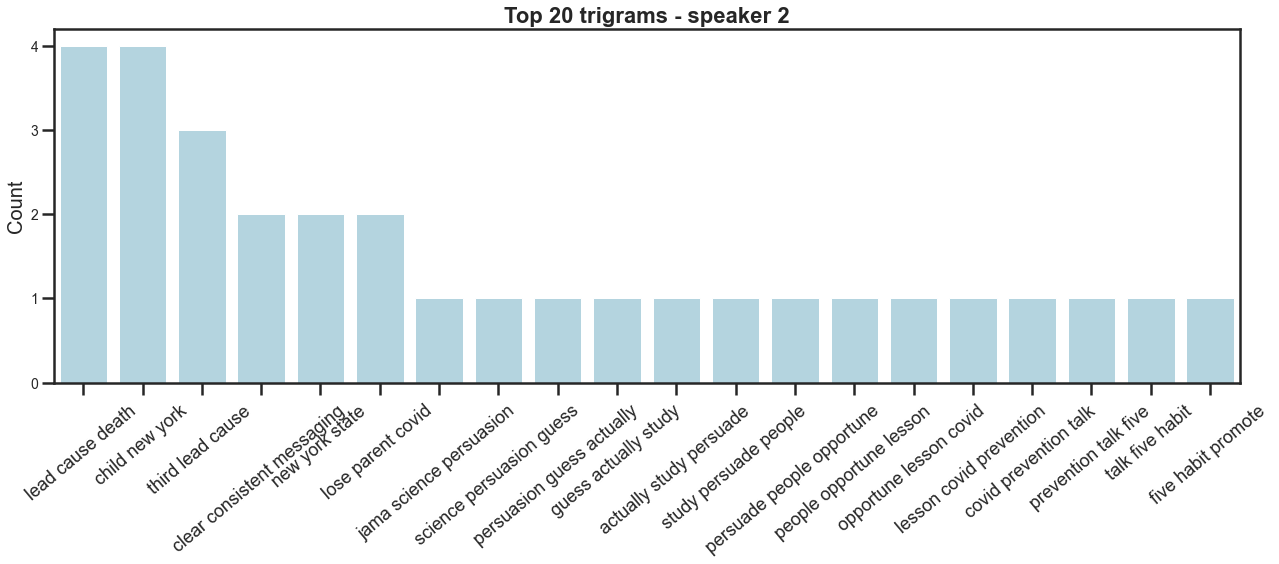

In [92]:
from collections import Counter
import matplotlib.pyplot as plt 

trigrams = nltk.trigrams(words)

df_trigrams = get_trigrams(trigrams, 10)

top25_tri = df_trigrams.iloc[:10,:]
info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count',  'pal':'lightblue',
       'title': 'Top 20 trigrams - speaker 2',
       'fname': graph2+'_trigrams.png',
       'angle': 40}
plot_frequency_chart(info)

['new york ', 5]
['lead cause ', 4]
['cause death ', 4]
['child new ', 4]
['third lead ', 3]
['lose parent ', 3]
['wear mask ', 2]
['make easy ', 2]
['easy start ', 2]
['existing habit ', 2]
['hand sanitizer ', 2]
['readily available ', 2]
['clear consistent ', 2]
['consistent messaging ', 2]
['make people ', 2]
['post facebook ', 2]
['back march ', 2]
['york state ', 2]
['find child ', 2]
['parent covid ', 2]


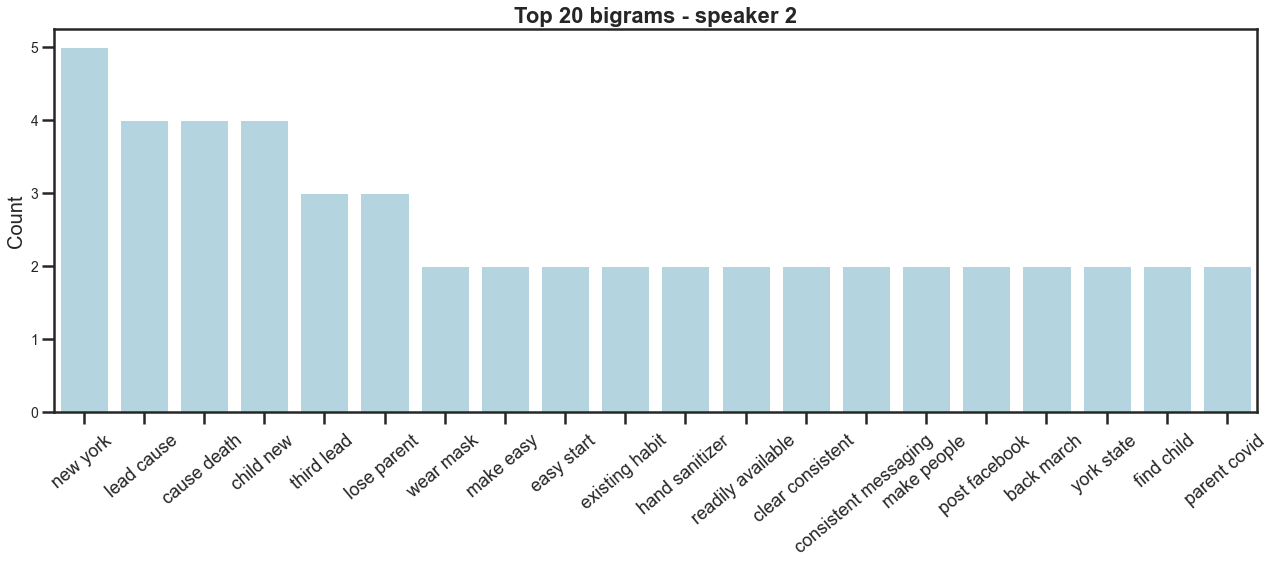

In [93]:
# import matplotlib.style as style
# style.available
# style.use('Solarize_Light2')

bigrams = nltk.bigrams(words)

df_bigrams = get_bigrams(bigrams, 10)
df_bigrams
top_tri = df_bigrams.iloc[:10,:]
info = {'data': df_bigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count', 'pal':'lightblue',
       'title': 'Top 20 bigrams - speaker 2',
       'fname': graph2+'_bigrams.png',
       'angle': 40}
plot_frequency_chart(info)

In [94]:
unigrams = Counter(words).most_common(15)
unigrams

[('people', 12),
 ('covid', 11),
 ('child', 11),
 ('make', 10),
 ('one', 9),
 ('actually', 8),
 ('say', 8),
 ('really', 7),
 ('facebook', 7),
 ('talk', 6),
 ('want', 6),
 ('behavior', 6),
 ('new', 6),
 ('easy', 5),
 ('good', 5)]

In [95]:
df

,section,text,time,text_clean,tokens,tokens_back_to_text
0,0,It's from JAMA.,15.642833,jama,[jama],jama
1,1,And it was on the science of persuasion.,15.660000,science persuasion,"[science, persuasion]",science persuasion
2,1,"How you can, um I guess there's actually been a lot of studies on How do you persuade people to do things and, um, opportune lessons for COVID-19 prevention.",15.694000,um guess actually lot study persuade people thing um opportune lesson covid prevention,"[um, guess, actually, lot, study, persuade, people, thing, um, opportune, lesson, covid, prevention]",um guess actually lot study persuade people thing um opportune lesson covid prevention
3,1,"So they talked about the five habit promoting strategies which, um, if you want somebody to develop a habit, get exercising or, um, eating more vegetables or wearing a mask.",15.835667,talk five habit promote strategy um want somebody develop habit get exercise um eat vegetable wear mask,"[talk, five, habit, promote, strategy, um, want, somebody, develop, habit, get, exercise, um, eat, vegetable, wear, mask]",talk five habit promote strategy um want somebody develop habit get exercise um eat vegetable wear mask
4,1,They said there's five things to do.,16.033667,say five thing,"[say, five, thing]",say five thing
5,1,You want to make it easy to start and easy to repeat.,16.054500,want make easy start easy repeat,"[want, make, easy, start, easy, repeat]",want make easy start easy repeat
6,1,"You wanna make it rewarding to repeat, you want to tie the behavior to an existing habit.",16.108167,wanna make rewarding repeat want tie behavior existing habit,"[wanna, make, rewarding, repeat, want, tie, behavior, existing, habit]",wanna make rewarding repeat want tie behavior existing habit
7,1,"And I know I do this with people all the time suggesting they take pills when they first like that, and talk about behaviors that conflict with existing habits and provide alternative behaviors an...",16.178833,know people time suggest take pill first like talk behavior conflict existing habit provide alternative behavior provide specific description desire behavior discuss um first one make behavior eas...,"[know, people, time, suggest, take, pill, first, like, talk, behavior, conflict, existing, habit, provide, alternative, behavior, provide, specific, description, desire, behavior, discuss, um, fir...",know people time suggest take pill first like talk behavior conflict existing habit provide alternative behavior provide specific description desire behavior discuss um first one make behavior eas...
8,1,"Repeat, making handwashing stations and hand sanitizer available everywhere really makes a difference on how often people wash their hands, and you know it's obvious.",16.488167,repeat make handwashing station hand sanitizer available everywhere really make difference often people wash hand know obvious,"[repeat, make, handwashing, station, hand, sanitizer, available, everywhere, really, make, difference, often, people, wash, hand, know, obvious]",repeat make handwashing station hand sanitizer available everywhere really make difference often people wash hand know obvious
9,1,"But, um, often we don't have hand sanitizer readily available, so making it readily available.",16.633833,um often hand sanitizer readily available make readily available,"[um, often, hand, sanitizer, readily, available, make, readily, available]",um often hand sanitizer readily available make readily available


### Section 1

In [96]:
df_filter = df.loc[(df.section==1) ]
text = df_filter[['text']]
text

text.to_csv(clean/data1_speaker2_section1, sep='\t', index=False, header=False)

In [97]:
data1_speaker2_section1

'2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_v2_speaker2_section1.txt'

In [98]:
clean_text=df_filter['tokens_back_to_text'].dropna()

big_string= ' '.join([text for text in clean_text])

exceptions_list = [ 'go ', 'pretty ', 'mostly', 'lot ', 'thing ', 
                   'cover ', 'know ', 'see ', 'also ', 'um ', 'think ',
                  'guess ', 'actually '] # pull out these words from the corpus
for word in exceptions_list:
    big_string=big_string.replace(word,'')

big_string=remove_special_characters(big_string, 
                          remove_digits=False)
    
words = big_string.split()
len(words) 

218

['clear consistent messaging ', 2]
['science persuasion study ', 1]
['persuasion study persuade ', 1]
['study persuade people ', 1]
['persuade people opportune ', 1]
['people opportune lesson ', 1]
['opportune lesson covid ', 1]
['lesson covid prevention ', 1]
['covid prevention talk ', 1]
['prevention talk five ', 1]
['talk five habit ', 1]
['five habit promote ', 1]
['habit promote strategy ', 1]
['promote strategy want ', 1]
['strategy want somebody ', 1]
['want somebody develop ', 1]
['somebody develop habit ', 1]
['develop habit get ', 1]
['habit get exercise ', 1]
['get exercise eat ', 1]


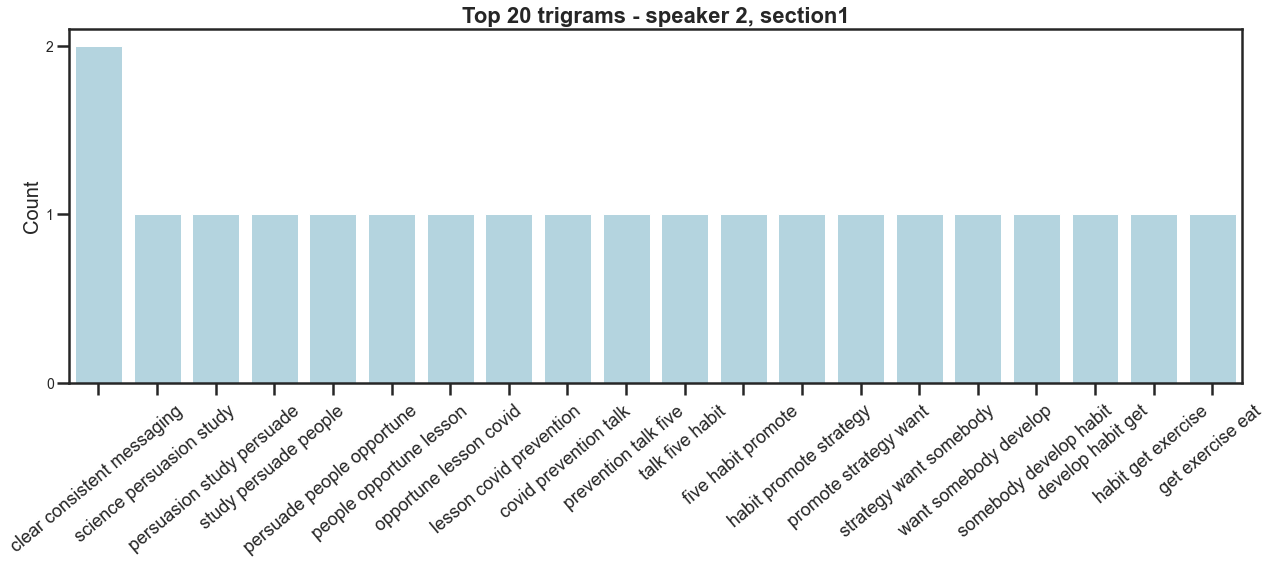

In [99]:
from collections import Counter
import matplotlib.pyplot as plt 

trigrams = nltk.trigrams(words)

df_trigrams = get_trigrams(trigrams, 10)

top25_tri = df_trigrams.iloc[:10,:]
info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count',  'pal':'lightblue',
       'title': 'Top 20 trigrams - speaker 2, section1',
       'fname': graph2+'_trigrams_section1.png',
       'angle': 40}
plot_frequency_chart(info)

In [100]:
trigrams = nltk.trigrams(words)
df_trigrams2 = get_trigrams(trigrams, 20)
top_tri = df_trigrams2.iloc[:4,:]
# top_tri
top_grams=list(top_tri['Grams'])
top_grams

['clear consistent messaging ', 2]
['science persuasion study ', 1]
['persuasion study persuade ', 1]
['study persuade people ', 1]
['persuade people opportune ', 1]
['people opportune lesson ', 1]
['opportune lesson covid ', 1]
['lesson covid prevention ', 1]
['covid prevention talk ', 1]
['prevention talk five ', 1]
['talk five habit ', 1]
['five habit promote ', 1]
['habit promote strategy ', 1]
['promote strategy want ', 1]
['strategy want somebody ', 1]
['want somebody develop ', 1]
['somebody develop habit ', 1]
['develop habit get ', 1]
['habit get exercise ', 1]
['get exercise eat ', 1]


['clear consistent messaging ',
 'science persuasion study ',
 'persuasion study persuade ',
 'study persuade people ']

['wear mask ', 2]
['make easy ', 2]
['easy start ', 2]
['existing habit ', 2]
['hand sanitizer ', 2]
['readily available ', 2]
['clear consistent ', 2]
['consistent messaging ', 2]
['make people ', 2]
['back march ', 2]
['science persuasion ', 1]
['persuasion study ', 1]
['study persuade ', 1]
['persuade people ', 1]
['people opportune ', 1]
['opportune lesson ', 1]
['lesson covid ', 1]
['covid prevention ', 1]
['prevention talk ', 1]
['talk five ', 1]


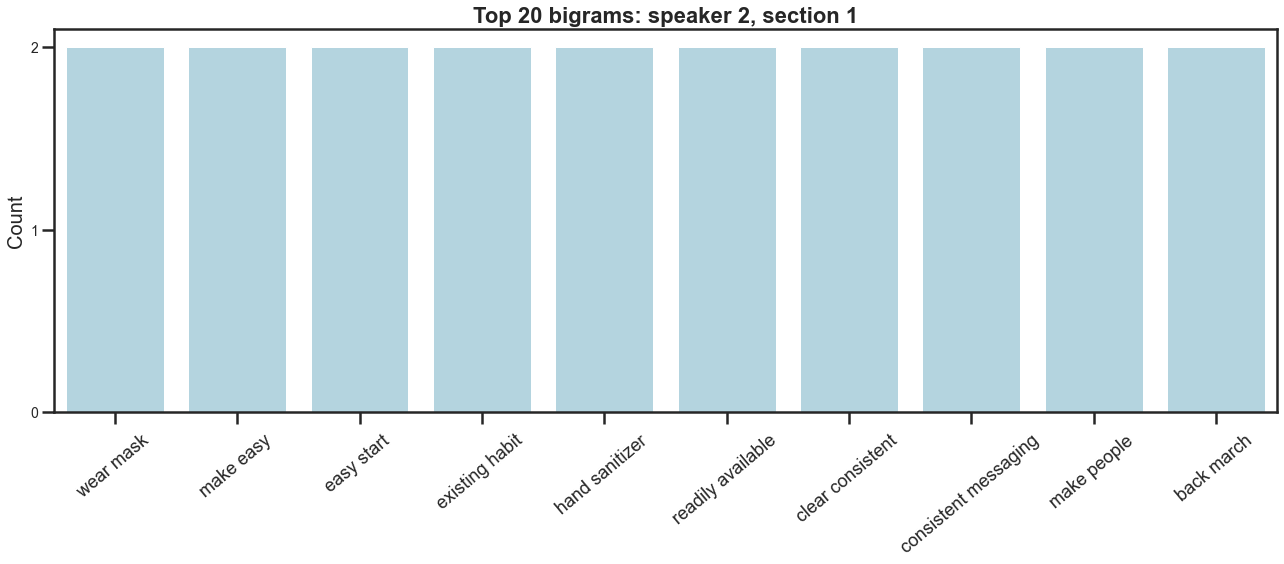

In [101]:
# import matplotlib.style as style
# style.available
# style.use('Solarize_Light2')

bigrams = nltk.bigrams(words)

df_bigrams = get_bigrams(bigrams, 10)
df_bigrams
top_bi = df_bigrams.iloc[:10,:]
info = {'data': top_bi, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count', 'pal':'lightblue',
       'title': 'Top 20 bigrams: speaker 2, section 1',
       'fname': graph2+'_bigrams_section1.png',
       'angle': 40}
plot_frequency_chart(info)

In [102]:
bigrams = nltk.bigrams(words)
df_bigrams2 = get_bigrams(bigrams, 20)
top_bi = df_bigrams2.iloc[:4,:]
# top_tri
top_bi_list=(list(top_bi['Grams']))
for i in top_bi_list:
    top_grams.append(i)
top_grams 

['wear mask ', 2]
['make easy ', 2]
['easy start ', 2]
['existing habit ', 2]
['hand sanitizer ', 2]
['readily available ', 2]
['clear consistent ', 2]
['consistent messaging ', 2]
['make people ', 2]
['back march ', 2]
['science persuasion ', 1]
['persuasion study ', 1]
['study persuade ', 1]
['persuade people ', 1]
['people opportune ', 1]
['opportune lesson ', 1]
['lesson covid ', 1]
['covid prevention ', 1]
['prevention talk ', 1]
['talk five ', 1]


['clear consistent messaging ',
 'science persuasion study ',
 'persuasion study persuade ',
 'study persuade people ',
 'wear mask ',
 'make easy ',
 'easy start ',
 'existing habit ']

In [103]:
unigrams = Counter(words).most_common(15)
unigrams

[('people', 11),
 ('make', 10),
 ('want', 6),
 ('say', 6),
 ('behavior', 6),
 ('talk', 5),
 ('easy', 5),
 ('habit', 4),
 ('wear', 3),
 ('mask', 3),
 ('repeat', 3),
 ('one', 3),
 ('hand', 3),
 ('available', 3),
 ('really', 3)]

In [104]:
for i in range(6):
    top_grams.append(unigrams[i][0])

In [105]:
top_grams

['clear consistent messaging ',
 'science persuasion study ',
 'persuasion study persuade ',
 'study persuade people ',
 'wear mask ',
 'make easy ',
 'easy start ',
 'existing habit ',
 'people',
 'make',
 'want',
 'say',
 'behavior',
 'talk']

In [106]:
grams=[]
for i in top_grams:
    x = i.replace("datum", "data")
    grams.append(x)
grams    

['clear consistent messaging ',
 'science persuasion study ',
 'persuasion study persuade ',
 'study persuade people ',
 'wear mask ',
 'make easy ',
 'easy start ',
 'existing habit ',
 'people',
 'make',
 'want',
 'say',
 'behavior',
 'talk']

In [107]:
f=open(clean/data1_speaker2_section1_key,'w')
for ele in grams:
    f.write('#'+ele+' ')

f.close()

### Section 2

In [111]:
df_filter = df.loc[(df.section==2) ]
text = df_filter[['text']]
text.to_csv(clean/data1_speaker2_section2, sep='\t', index=False, header=False)

clean_text=df_filter['tokens_back_to_text'].dropna()

big_string= ' '.join([text for text in clean_text])

exceptions_list = [ 'go ', 'pretty ', 'mostly', 'lot ', 'thing ', 
                   'cover ', 'know ', 'see ', 'also ', 'um ', 'think ',
                  'guess ', 'actually ', 'th '] # pull out these words from the corpus
for word in exceptions_list:
    big_string=big_string.replace(word,'')

big_string=remove_special_characters(big_string, 
                          remove_digits=False)
    
words = big_string.split()
len(words) 

173

In [109]:
df_filter

,section,text,time,text_clean,tokens,tokens_back_to_text
23,2,"We're still learning lessons about this and then Scientific American and, um, published something This week, COVID is actually the third leading cause of death in the US for this year.",18.192667,still learn lesson scientific american um publish something week covid actually third lead cause death us year,"[still, learn, lesson, scientific, american, um, publish, something, week, covid, actually, third, lead, cause, death, us, year]",still learn lesson scientific american um publish something week covid actually third lead cause death us year
24,2,It became the third leading cause of death March 4th and it was actually the first leading cause of death from April 5th to May 3rd.,18.390667,become third lead cause death march th actually first lead cause death april th may rd,"[become, third, lead, cause, death, march, th, actually, first, lead, cause, death, april, th, may, rd]",become third lead cause death march th actually first lead cause death april th may rd
25,2,And it's been the third leading cause of death with about the year and then indirect effects on Children in New York state.,18.498167,third lead cause death year indirect effect child new york state,"[third, lead, cause, death, year, indirect, effect, child, new, york, state]",third lead cause death year indirect effect child new york state
26,2,This one was actually really quite heartbreaking.,18.633500,one actually really quite heartbreaking,"[one, actually, really, quite, heartbreaking]",one actually really quite heartbreaking
27,2,"Um, the United Hospital Fund found that 4200 Children in New York had lost a parent to COVID-19 this year.",18.675667,um united hospital fund find child new york lose parent covid year,"[um, united, hospital, fund, find, child, new, york, lose, parent, covid, year]",um united hospital fund find child new york lose parent covid year
28,2,"About 950 were Children, single parents and say, Well, they lost their only parent.",18.800667,child single parent say well lose parent,"[child, single, parent, say, well, lose, parent]",child single parent say well lose parent
29,2,"Um oh, it was one in 1000 Children in New York state lost a parent to COVID-19, um, one in 600 black Children, one in 700 Hispanic Children in one of 1500 white Children, Um, 57% were in Queens, B...",18.905667,um oh one child new york state lose parent covid um one black child one hispanic child one white child um queen brooklyn bronx hard hit area,"[um, oh, one, child, new, york, state, lose, parent, covid, um, one, black, child, one, hispanic, child, one, white, child, um, queen, brooklyn, bronx, hard, hit, area]",um oh one child new york state lose parent covid um one black child one hispanic child one white child um queen brooklyn bronx hard hit area
30,2,That was really that was fairly heartbreaking.,19.195500,really fairly heartbreaking,"[really, fairly, heartbreaking]",really fairly heartbreaking
31,2,"And then they also found that 325,000 Children were pushed into poverty or near poverty in New York, which was roughly 8% of Children in New York who had not been poverty before COVID-19 started.",19.242333,also find child push poverty near poverty new york roughly child new york poverty covid start,"[also, find, child, push, poverty, near, poverty, new, york, roughly, child, new, york, poverty, covid, start]",also find child push poverty near poverty new york roughly child new york poverty covid start
32,2,"And they estimated it was gonna cost anywhere from 550 to 800 million just to support the basic needs of these Children and household severe new, newly newly in or near poverty over the next year.",19.432833,estimate go cost anywhere million support basic need child household severe new newly newly near poverty next year,"[estimate, go, cost, anywhere, million, support, basic, need, child, household, severe, new, newly, newly, near, poverty, next, year]",estimate go cost anywhere million support ba

['child new york ', 4]
['third lead cause ', 3]
['new york state ', 2]
['lose parent covid ', 2]
['still learn lesson ', 1]
['learn lesson scientific ', 1]
['lesson scientific american ', 1]
['scientific american publish ', 1]
['american publish someweek ', 1]
['publish someweek covid ', 1]
['someweek covid third ', 1]
['covid third lead ', 1]
['lead cause deaus ', 1]
['cause deaus year ', 1]
['deaus year become ', 1]
['year become third ', 1]
['become third lead ', 1]
['lead cause deamarch ', 1]
['cause deamarch first ', 1]
['deamarch first lead ', 1]


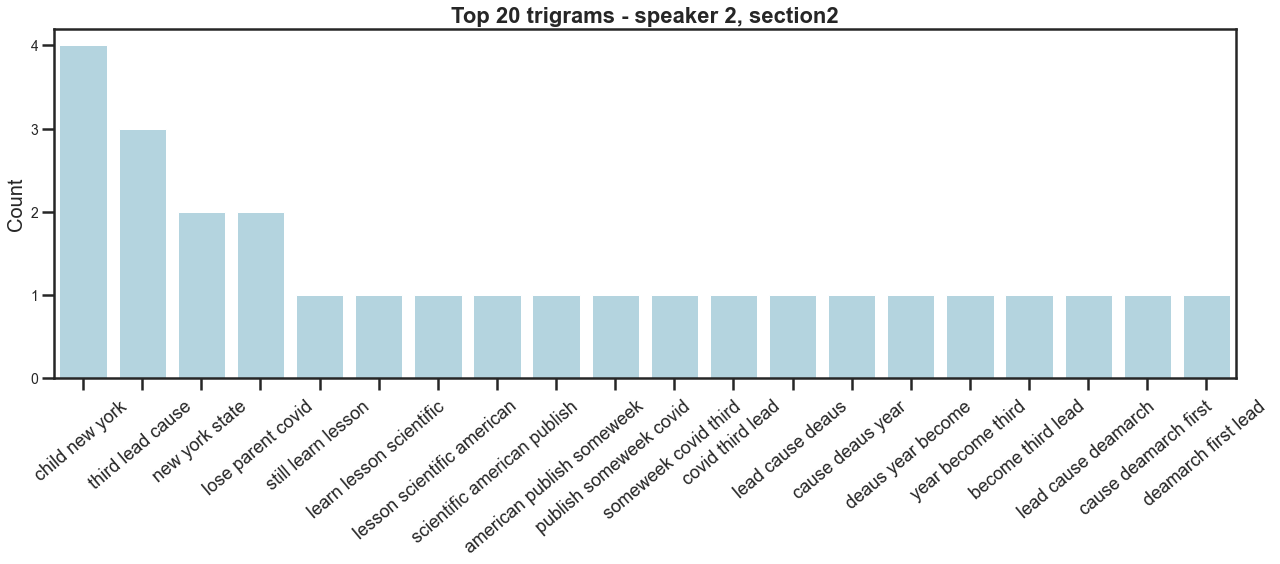

In [107]:
from collections import Counter
import matplotlib.pyplot as plt 

trigrams = nltk.trigrams(words)

df_trigrams = get_trigrams(trigrams, 10)

top25_tri = df_trigrams.iloc[:10,:]
info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count',  'pal':'lightblue',
       'title': 'Top 20 trigrams - speaker 2, section2',
       'fname': graph1+'_trigrams_section2.png',
       'angle': 40}
plot_frequency_chart(info)

In [108]:
trigrams = nltk.trigrams(words)
df_trigrams2 = get_trigrams(trigrams, 20)
top_tri = df_trigrams2.iloc[:4,:]
# top_tri
top_grams=list(top_tri['Grams'])
top_grams

['child new york ', 4]
['third lead cause ', 3]
['new york state ', 2]
['lose parent covid ', 2]
['still learn lesson ', 1]
['learn lesson scientific ', 1]
['lesson scientific american ', 1]
['scientific american publish ', 1]
['american publish someweek ', 1]
['publish someweek covid ', 1]
['someweek covid third ', 1]
['covid third lead ', 1]
['lead cause deaus ', 1]
['cause deaus year ', 1]
['deaus year become ', 1]
['year become third ', 1]
['become third lead ', 1]
['lead cause deamarch ', 1]
['cause deamarch first ', 1]
['deamarch first lead ', 1]


['child new york ',
 'third lead cause ',
 'new york state ',
 'lose parent covid ']

['new york ', 5]
['lead cause ', 4]
['child new ', 4]
['third lead ', 3]
['lose parent ', 3]
['york state ', 2]
['find child ', 2]
['parent covid ', 2]
['child one ', 2]
['near poverty ', 2]
['fairly similar ', 2]
['still learn ', 1]
['learn lesson ', 1]
['lesson scientific ', 1]
['scientific american ', 1]
['american publish ', 1]
['publish someweek ', 1]
['someweek covid ', 1]
['covid third ', 1]
['cause deaus ', 1]


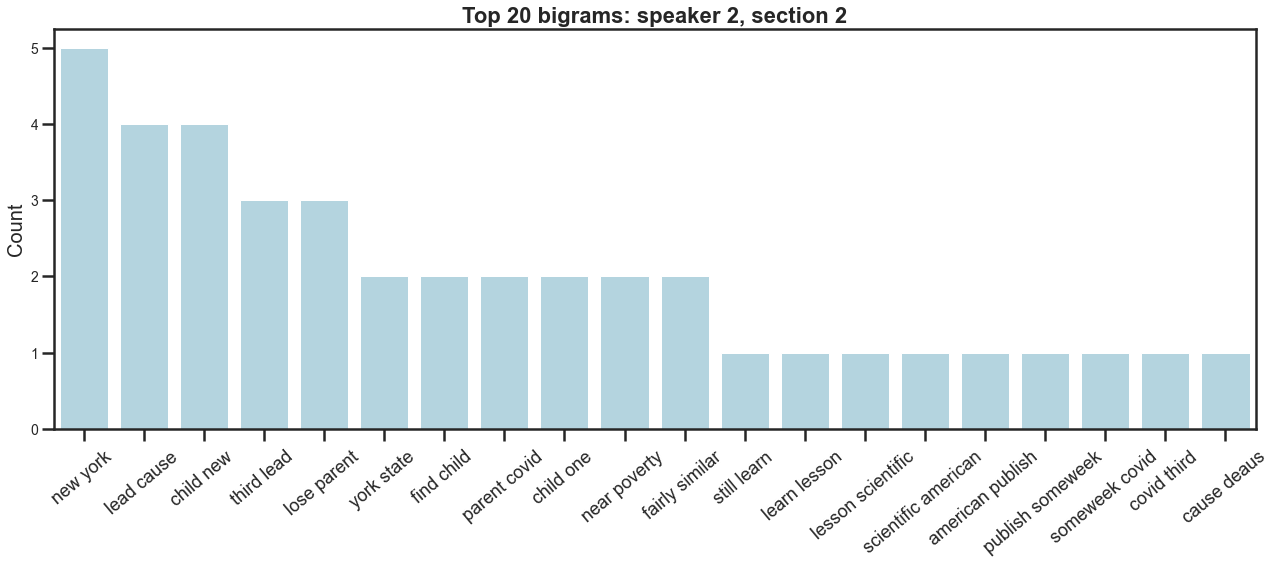

In [109]:
# import matplotlib.style as style
# style.available
# style.use('Solarize_Light2')

bigrams = nltk.bigrams(words)

df_bigrams = get_bigrams(bigrams, 10)
df_bigrams
top_tri = df_bigrams.iloc[:10,:]
info = {'data': df_bigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count', 'pal':'lightblue',
       'title': 'Top 20 bigrams: speaker 2, section 2',
       'fname': graph1+'_bigrams_section2.png',
       'angle': 40}
plot_frequency_chart(info)

In [110]:
bigrams = nltk.bigrams(words)
df_bigrams2 = get_bigrams(bigrams, 20)
top_bi = df_bigrams2.iloc[:4,:]
# top_tri
top_bi_list=(list(top_bi['Grams']))
for i in top_bi_list:
    top_grams.append(i)
top_grams 

['new york ', 5]
['lead cause ', 4]
['child new ', 4]
['third lead ', 3]
['lose parent ', 3]
['york state ', 2]
['find child ', 2]
['parent covid ', 2]
['child one ', 2]
['near poverty ', 2]
['fairly similar ', 2]
['still learn ', 1]
['learn lesson ', 1]
['lesson scientific ', 1]
['scientific american ', 1]
['american publish ', 1]
['publish someweek ', 1]
['someweek covid ', 1]
['covid third ', 1]
['cause deaus ', 1]


['child new york ',
 'third lead cause ',
 'new york state ',
 'lose parent covid ',
 'new york ',
 'lead cause ',
 'child new ',
 'third lead ']

In [111]:
unigrams = Counter(words).most_common(15)
unigrams

[('child', 11),
 ('covid', 7),
 ('new', 6),
 ('one', 6),
 ('york', 5),
 ('lead', 4),
 ('cause', 4),
 ('lose', 4),
 ('parent', 4),
 ('poverty', 4),
 ('third', 3),
 ('year', 3),
 ('really', 3),
 ('fairly', 3),
 ('american', 2)]

In [112]:
for i in range(6):
    top_grams.append(unigrams[i][0])

In [113]:
top_grams

['child new york ',
 'third lead cause ',
 'new york state ',
 'lose parent covid ',
 'new york ',
 'lead cause ',
 'child new ',
 'third lead ',
 'child',
 'covid',
 'new',
 'one',
 'york',
 'lead']

In [114]:
grams=[]
for i in top_grams:
    x = i.replace("datum", "data")
    grams.append(x)
grams    

['child new york ',
 'third lead cause ',
 'new york state ',
 'lose parent covid ',
 'new york ',
 'lead cause ',
 'child new ',
 'third lead ',
 'child',
 'covid',
 'new',
 'one',
 'york',
 'lead']

In [115]:
f=open(clean/data1_speaker2_section2_key,'w')
for ele in grams:
    f.write('#'+ele+' ')

f.close()

### Section 3

In [112]:
df_filter = df.loc[(df.section==3) ]
text = df_filter[['text']]
text.to_csv(clean/data1_speaker2_section3, sep='\t', index=False, header=False)

clean_text=df_filter['tokens_back_to_text'].dropna()

big_string= ' '.join([text for text in clean_text])

exceptions_list = [ 'go ', 'pretty ', 'mostly', 'lot ', 'thing ', 
                   'cover ', 'know ', 'see ', 'also ', 'still ', 'somewhat ',
                  'finally', 'make', 'final ', 'um '] # pull out these words from the corpus
for word in exceptions_list:
    big_string=big_string.replace(word,'')

big_string=remove_special_characters(big_string, 
                          remove_digits=False)
    
words = big_string.split()
len(words) 

103

In [158]:
data1_speaker2_section3

'2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_v2_speaker2_section3.txt'

['necessarily think worth ', 1]
['think worth summarize ', 1]
['worth summarize think ', 1]
['summarize think worth ', 1]
['think worth either ', 1]
['worth either read ', 1]
['either read pass ', 1]
['read pass along ', 1]
['pass along difficult ', 1]
['along difficult uncle ', 1]
['difficult uncle facebook ', 1]
['uncle facebook covid ', 1]
['facebook covid myth ', 1]
['covid myth busting ', 1]
['myth busting robin ', 1]
['busting robin pronounce ', 1]
['robin pronounce schoenthaler ', 1]
['pronounce schoenthaler think ', 1]
['schoenthaler think post ', 1]
['think post facebook ', 1]


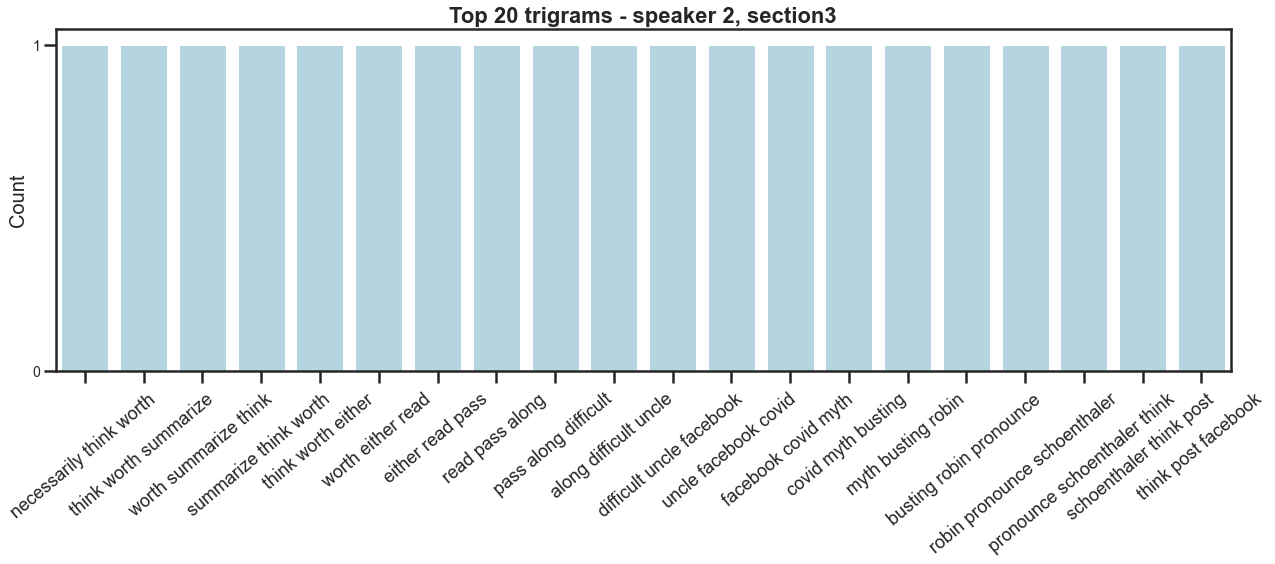

In [117]:
from collections import Counter
import matplotlib.pyplot as plt 

trigrams = nltk.trigrams(words)

df_trigrams = get_trigrams(trigrams, 10)

top25_tri = df_trigrams.iloc[:10,:]
info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count',  'pal':'lightblue',
       'title': 'Top 20 trigrams - speaker 2, section3',
       'fname': graph1+'_trigrams_section3.png',
       'angle': 40}
plot_frequency_chart(info)

In [118]:
trigrams = nltk.trigrams(words)
df_trigrams2 = get_trigrams(trigrams, 20)
top_tri = df_trigrams2.iloc[:4,:]
# top_tri
top_grams=list(top_tri['Grams'])
top_grams

['necessarily think worth ', 1]
['think worth summarize ', 1]
['worth summarize think ', 1]
['summarize think worth ', 1]
['think worth either ', 1]
['worth either read ', 1]
['either read pass ', 1]
['read pass along ', 1]
['pass along difficult ', 1]
['along difficult uncle ', 1]
['difficult uncle facebook ', 1]
['uncle facebook covid ', 1]
['facebook covid myth ', 1]
['covid myth busting ', 1]
['myth busting robin ', 1]
['busting robin pronounce ', 1]
['robin pronounce schoenthaler ', 1]
['pronounce schoenthaler think ', 1]
['schoenthaler think post ', 1]
['think post facebook ', 1]


['necessarily think worth ',
 'think worth summarize ',
 'worth summarize think ',
 'summarize think worth ']

['think worth ', 3]
['quite good ', 2]
['grand round ', 2]
['julie thompson ', 2]
['necessarily think ', 1]
['worth summarize ', 1]
['summarize think ', 1]
['worth either ', 1]
['either read ', 1]
['read pass ', 1]
['pass along ', 1]
['along difficult ', 1]
['difficult uncle ', 1]
['uncle facebook ', 1]
['facebook covid ', 1]
['covid myth ', 1]
['myth busting ', 1]
['busting robin ', 1]
['robin pronounce ', 1]
['pronounce schoenthaler ', 1]


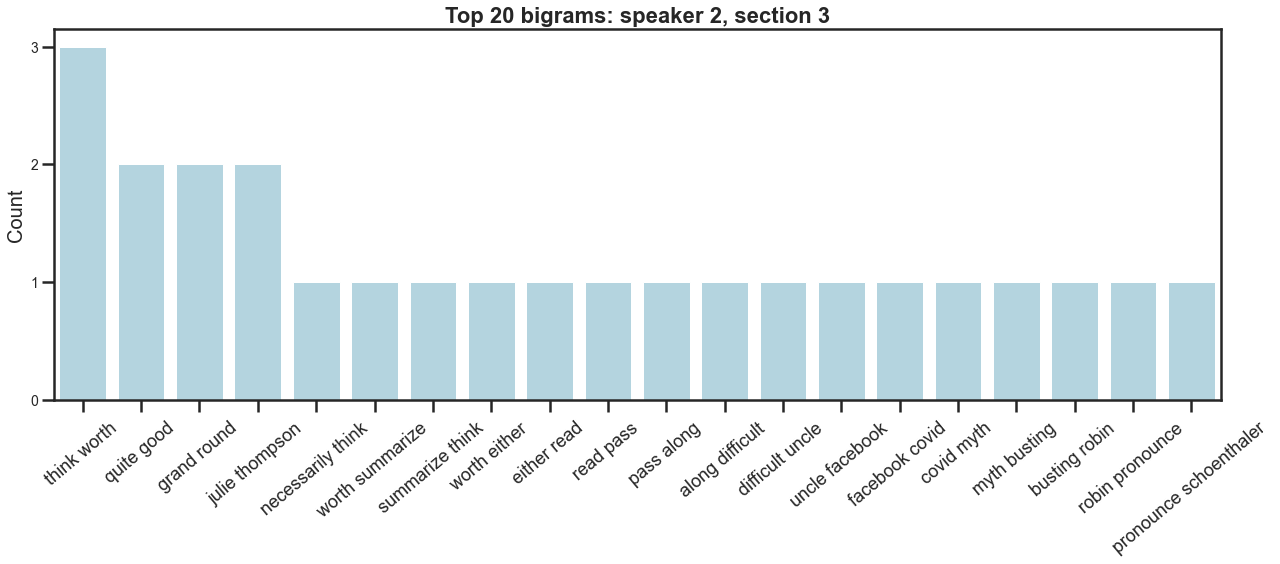

In [119]:
# import matplotlib.style as style
# style.available
# style.use('Solarize_Light2')

bigrams = nltk.bigrams(words)

df_bigrams = get_bigrams(bigrams, 10)
df_bigrams
top_tri = df_bigrams.iloc[:10,:]
info = {'data': df_bigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count', 'pal':'lightblue',
       'title': 'Top 20 bigrams: speaker 2, section 3',
       'fname': graph1+'_bigrams_section3.png',
       'angle': 40}
plot_frequency_chart(info)

In [120]:
bigrams = nltk.bigrams(words)
df_bigrams2 = get_bigrams(bigrams, 20)
top_bi = df_bigrams2.iloc[:4,:]
# top_tri
top_bi_list=(list(top_bi['Grams']))
for i in top_bi_list:
    top_grams.append(i)
top_grams 

['think worth ', 3]
['quite good ', 2]
['grand round ', 2]
['julie thompson ', 2]
['necessarily think ', 1]
['worth summarize ', 1]
['summarize think ', 1]
['worth either ', 1]
['either read ', 1]
['read pass ', 1]
['pass along ', 1]
['along difficult ', 1]
['difficult uncle ', 1]
['uncle facebook ', 1]
['facebook covid ', 1]
['covid myth ', 1]
['myth busting ', 1]
['busting robin ', 1]
['robin pronounce ', 1]
['pronounce schoenthaler ', 1]


['necessarily think worth ',
 'think worth summarize ',
 'worth summarize think ',
 'summarize think worth ',
 'think worth ',
 'quite good ',
 'grand round ',
 'julie thompson ']

In [121]:
unigrams = Counter(words).most_common(15)
unigrams

[('facebook', 6),
 ('worth', 5),
 ('think', 4),
 ('covid', 3),
 ('article', 3),
 ('summarize', 2),
 ('read', 2),
 ('myth', 2),
 ('post', 2),
 ('quite', 2),
 ('good', 2),
 ('grand', 2),
 ('round', 2),
 ('medical', 2),
 ('julie', 2)]

In [122]:
for i in range(6):
    top_grams.append(unigrams[i][0])

In [123]:
top_grams

['necessarily think worth ',
 'think worth summarize ',
 'worth summarize think ',
 'summarize think worth ',
 'think worth ',
 'quite good ',
 'grand round ',
 'julie thompson ',
 'facebook',
 'worth',
 'think',
 'covid',
 'article',
 'summarize']

In [124]:
grams=[]
for i in top_grams:
    x = i.replace("datum", "data")
    grams.append(x)
grams    

['necessarily think worth ',
 'think worth summarize ',
 'worth summarize think ',
 'summarize think worth ',
 'think worth ',
 'quite good ',
 'grand round ',
 'julie thompson ',
 'facebook',
 'worth',
 'think',
 'covid',
 'article',
 'summarize']

In [125]:
f=open(clean/data1_speaker2_section2_key,'w')
for ele in grams:
    f.write('#'+ele+' ')

f.close()

In [126]:
bigrams = nltk.bigrams(words)
df_bigrams2 = get_bigrams(bigrams, 20)
top_bi = df_bigrams2.iloc[:4,:]
# top_tri
top_bi_list=(list(top_bi['Grams']))
for i in top_bi_list:
    top_grams.append(i)
top_grams 

unigrams = Counter(words).most_common(15)
unigrams

for i in range(6):
    top_grams.append(unigrams[i][0])

top_grams

grams=[]
for i in top_grams:
    x = i.replace("datum", "data")
    grams.append(x)
grams    

f=open(clean/data1_speaker2_section3_key,'w')
for ele in grams:
    f.write('#'+ele+' ')

f.close()

['think worth ', 3]
['quite good ', 2]
['grand round ', 2]
['julie thompson ', 2]
['necessarily think ', 1]
['worth summarize ', 1]
['summarize think ', 1]
['worth either ', 1]
['either read ', 1]
['read pass ', 1]
['pass along ', 1]
['along difficult ', 1]
['difficult uncle ', 1]
['uncle facebook ', 1]
['facebook covid ', 1]
['covid myth ', 1]
['myth busting ', 1]
['busting robin ', 1]
['robin pronounce ', 1]
['pronounce schoenthaler ', 1]


# Q&A

## Extract questions from chat

In [127]:
# make a list of lists
text_list = open(textfile/videoq).readlines()

In [128]:
for i in range(5):
    print(text_list[i])

12:03:52	 From  Digital Librarian - ECHO Institute (Kent) : 

Safety and Immunogenicity of SARS-CoV-2 mRNA-1273 Vaccine in Older Adults (Anderson, et.al.):

https://doi.org/10.1056/NEJMoa2028436

12:05:25	 From  Claudia Guzman : Can't hear when Dr. Sosa turns his head downward

12:06:09	 From  Martha Lins : Sound good now thank you



In [129]:
questions=[]
import re 
  
# initializing list  
test_list = ['? ', '?\n'] 
  
for i in text_list:
    res = [ele for ele in test_list if(ele in i)]
    if bool(res)== True:
#             print(i)
            questions.append(i)

In [130]:
len(questions)

13

In [131]:
questions_clean=[]
for q in questions:
    clean=q.split(':')
#     print(clean[3])
    questions_clean.append(clean[3])

In [132]:
# for q in questions_clean:
#     print(q)
len(questions_clean)

13

In [133]:
# f=open(clean/dataq_questions,'w') 
f=open('data/clean/2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_chat_questions.txt','w')
i=0
for q in questions_clean:
    i+=1
    f.write(str(i)+'. '+q+'\n')

f.close()

In [134]:
questions_clean

[' In those with prolonged symptoms, does that correlate with prolonged viral shedding and infectivity?\n',
 ' Are patients reporting their Covid-19 tests are not being covered by Premera or BC/BS insurance vs Medicare if for travel and they have not had exposures or symptoms?\n',
 ' did the increase in CV-19 relate to the increase in testing?\n',
 ' If Covid19 is airborne, then we have to improve the ventilation in many/most places to created negative pressure. How is this being addressed?\n',
 ' Based on what we know today, how relevant is to take the temperature of patients to enter a clinic?\n',
 ' CDC says children less than 2 should not wear a mask; some pediatricians are advising children less than 5 should not wear a mask. How do we advise our clients?\n',
 ' In relation to airborne issues, does UV light work?\n',
 ' Should we be using more N-95 type masks and less surgical masks in the healthcare settings?\n',
 ' Does the hospital have enough N-95?s for staff?\n',
 ' COVID19 i

## Normalize and clean-up

### Build normalizer

In [135]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from contractions import CONTRACTION_MAP
import unicodedata
from bs4 import BeautifulSoup

nlp = spacy.load('en', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
# stopword_list.remove('no')
# stopword_list.remove('not')

# 1. Remove html tags
def strip_html_tags(text):
    soup=BeautifulSoup(text,"html.parser")
    stripped_text=soup.get_text()
    return stripped_text
strip_html_tags('<html><h2>Some important text</h2></html>')

# 2. Remove accents
def remove_accented_chars(text):    
    text=unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
remove_accented_chars('Sómê Áccèntéd téxt')

# 3. Expand contractions
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
expand_contractions("Y'all can't expand contractions I'd think")

# 4. Remove special characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, ' ', text)
    return text
remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

# 5. Lemmatization
def lemmatize_text(text):
    text=nlp(text)
    text=' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
lemmatize_text('My system keeps crashing! his crashed yesterday, ours crashes daily')

# 6. Stemming
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

# 7. Remove stopwords
def remove_stopwords(text, is_lowercase=False):
    tokens=tokenizer.tokenize(text)
    tokens=[token.strip() for token in tokens]
    if is_lowercase:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens=[token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
remove_stopwords("The, and, if are stopwords, computer is not")


', , stopwords , computer'

In [136]:
# Turn on functions as desired
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    # Run normalizer on corpus
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [137]:
clean_text = normalize_corpus(questions_clean)
clean_text 

['prolonged symptom correlate prolong viral shedding infectivity',
 'patient report covid test cover premera bc bs insurance vs medicare travel exposure symptom',
 'increase cv relate increase testing',
 'covid airborne improve ventilation many place create negative pressure address',
 'base know today relevant take temperature patient enter clinic',
 'cdc say child less wear mask pediatrician advise child less wear mask advise client',
 'relation airborne issue uv light work',
 'use n type mask less surgical mask healthcare setting',
 'hospital enough n staff',
 'covid transmit via fomite droplet airborne know number one way people get',
 'recommend continue take temperature patient come clinic risk factor continue recommend method screen covid',
 'go less likely develop antibody get monoclonal antibody',
 'really important question leslie test isolate per cdc clear really complicate decision tree get second positive test person still shed infectious virus even know work short viral c

### Tokenize

In [138]:
from spacy.tokenizer import Tokenizer
tokens = []
tokenizer = Tokenizer(nlp.vocab)


for doc in tokenizer.pipe(df['text_clean'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
#         print(token)
        doc_tokens.append(token)
    tokens.append(doc_tokens)
# Makes tokens column
df['tokens']=tokens

df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df['tokens']]

In [139]:
df.head(50)

,section,text,time,text_clean,tokens,tokens_back_to_text
0,0,It's from JAMA.,15.642833,jama,[jama],jama
1,1,And it was on the science of persuasion.,15.660000,science persuasion,"[science, persuasion]",science persuasion
2,1,"How you can, um I guess there's actually been a lot of studies on How do you persuade people to do things and, um, opportune lessons for COVID-19 prevention.",15.694000,um guess actually lot study persuade people thing um opportune lesson covid prevention,"[um, guess, actually, lot, study, persuade, people, thing, um, opportune, lesson, covid, prevention]",um guess actually lot study persuade people thing um opportune lesson covid prevention
3,1,"So they talked about the five habit promoting strategies which, um, if you want somebody to develop a habit, get exercising or, um, eating more vegetables or wearing a mask.",15.835667,talk five habit promote strategy um want somebody develop habit get exercise um eat vegetable wear mask,"[talk, five, habit, promote, strategy, um, want, somebody, develop, habit, get, exercise, um, eat, vegetable, wear, mask]",talk five habit promote strategy um want somebody develop habit get exercise um eat vegetable wear mask
4,1,They said there's five things to do.,16.033667,say five thing,"[say, five, thing]",say five thing
5,1,You want to make it easy to start and easy to repeat.,16.054500,want make easy start easy repeat,"[want, make, easy, start, easy, repeat]",want make easy start easy repeat
6,1,"You wanna make it rewarding to repeat, you want to tie the behavior to an existing habit.",16.108167,wanna make rewarding repeat want tie behavior existing habit,"[wanna, make, rewarding, repeat, want, tie, behavior, existing, habit]",wanna make rewarding repeat want tie behavior existing habit
7,1,"And I know I do this with people all the time suggesting they take pills when they first like that, and talk about behaviors that conflict with existing habits and provide alternative behaviors an...",16.178833,know people time suggest take pill first like talk behavior conflict existing habit provide alternative behavior provide specific description desire behavior discuss um first one make behavior eas...,"[know, people, time, suggest, take, pill, first, like, talk, behavior, conflict, existing, habit, provide, alternative, behavior, provide, specific, description, desire, behavior, discuss, um, fir...",know people time suggest take pill first like talk behavior conflict existing habit provide alternative behavior provide specific description desire behavior discuss um first one make behavior eas...
8,1,"Repeat, making handwashing stations and hand sanitizer available everywhere really makes a difference on how often people wash their hands, and you know it's obvious.",16.488167,repeat make handwashing station hand sanitizer available everywhere really make difference often people wash hand know obvious,"[repeat, make, handwashing, station, hand, sanitizer, available, everywhere, really, make, difference, often, people, wash, hand, know, obvious]",repeat make handwashing station hand sanitizer available everywhere really make difference often people wash hand know obvious
9,1,"But, um, often we don't have hand sanitizer readily available, so making it readily available.",16.633833,um often hand sanitizer readily available make readily available,"[um, often, hand, sanitizer, readily, available, make, readily, available]",um often hand sanitizer readily available make readily available


In [140]:
df.head()

,section,text,time,text_clean,tokens,tokens_back_to_text
0,0,It's from JAMA.,15.642833,jama,[jama],jama
1,1,And it was on the science of persuasion.,15.660000,science persuasion,"[science, persuasion]",science persuasion
2,1,"How you can, um I guess there's actually been a lot of studies on How do you persuade people to do things and, um, opportune lessons for COVID-19 prevention.",15.694000,um guess actually lot study persuade people thing um opportune lesson covid prevention,"[um, guess, actually, lot, study, persuade, people, thing, um, opportune, lesson, covid, prevention]",um guess actually lot study persuade people thing um opportune lesson covid prevention
3,1,"So they talked about the five habit promoting strategies which, um, if you want somebody to develop a habit, get exercising or, um, eating more vegetables or wearing a mask.",15.835667,talk five habit promote strategy um want somebody develop habit get exercise um eat vegetable wear mask,"[talk, five, habit, promote, strategy, um, want, somebody, develop, habit, get, exercise, um, eat, vegetable, wear, mask]",talk five habit promote strategy um want somebody develop habit get exercise um eat vegetable wear mask
4,1,They said there's five things to do.,16.033667,say five thing,"[say, five, thing]",say five thing


## Text mining

In [141]:
def get_trigrams(trigrams, top_grams):    
    grams_str = []
    data = []
    gram_counter = Counter(trigrams)
    for grams in gram_counter.most_common(20):
        gram = ''
        grams_str = grams[0]
        grams_str_count = []
        for n in range(0,3):
            gram = gram + grams_str[n] + ' '
        grams_str_count.append(gram)
        grams_str_count.append(grams[1])
        data.append(grams_str_count)
        print(grams_str_count)
    df = pd.DataFrame(data, columns = ['Grams', 'Count'])
    return df

def get_bigrams(bigrams, top_grams):    
    grams_str = []
    data = []

    gram_counter = Counter(bigrams)
    
    for grams in gram_counter.most_common(20):
        gram = ''
        grams_str = grams[0]
        grams_str_count = []
        for n in range(0,2):
            gram = gram + grams_str[n] + ' '
        grams_str_count.append(gram)
        grams_str_count.append(grams[1])
        data.append(grams_str_count)
        print(grams_str_count)
    df = pd.DataFrame(data, columns = ['Grams', 'Count'])
    return df


import seaborn as sns
def plot_frequency_chart(info):
#     sns.set_style("white")
    sns.set_style("ticks")
    sns.set_context("poster")
    sns.plotting_context()
    fig, ax = plt.subplots(figsize=(18, 8))
#     plt.style.use('seaborn-whitegrid')
    sns.set_context("notebook", font_scale=1)    
    ax = sns.barplot(x=info['x'], y=info['y'], data=info['data']
                     , color=(info['pal'])
                    )
    ax.yaxis.get_major_locator().set_params(integer=True)
    ax.set_title(label=info['title'], fontweight='bold', size=22)
    plt.ylabel(info['ylab'], fontsize=20)
    plt.xlabel(info['xlab'], fontsize=20)
    plt.xticks(rotation=info['angle'],fontsize=18)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig(graphs/info['fname'])
    return

nlp = spacy.load('en_core_web_lg')
# Tokenizer
# tokenizer = Tokenizer(nlp.vocab)


In [142]:
big_string= ' '.join([text for text in clean_text])

exceptions_list = [ 'go ', 'pretty ', 'mostly', 'lot ', 'thing ', 
                   'cover ', 'know ', 'see ', 'also ', 'um ', 'think '] # pull out these words from the corpus
for word in exceptions_list:
    big_string=big_string.replace(word,'')

big_string=remove_special_characters(big_string, 
                          remove_digits=False)
    
words = big_string.split()
len(words) 

135

['take temperature patient ', 2]
['child less wear ', 2]
['less wear mask ', 2]
['prolonged symptom correlate ', 1]
['symptom correlate prolong ', 1]
['correlate prolong viral ', 1]
['prolong viral shedding ', 1]
['viral shedding infectivity ', 1]
['shedding infectivity patient ', 1]
['infectivity patient report ', 1]
['patient report covid ', 1]
['report covid test ', 1]
['covid test premera ', 1]
['test premera bc ', 1]
['premera bc bs ', 1]
['bc bs insurance ', 1]
['bs insurance vs ', 1]
['insurance vs medicare ', 1]
['vs medicare travel ', 1]
['medicare travel exposure ', 1]


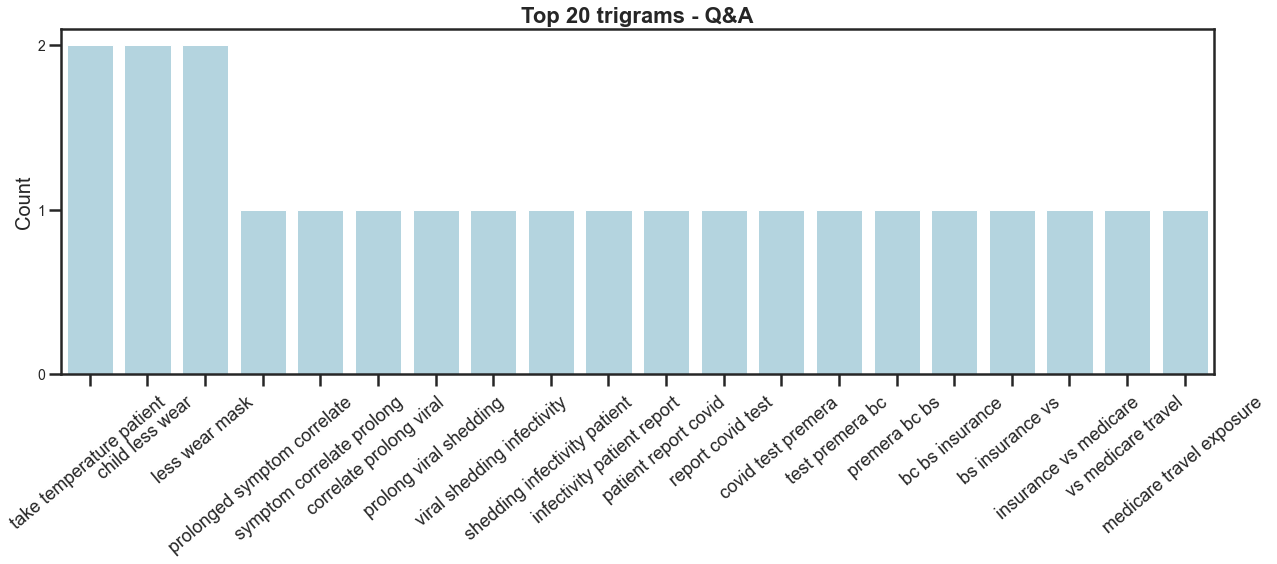

In [143]:
from collections import Counter
import matplotlib.pyplot as plt 

trigrams = nltk.trigrams(words)

df_trigrams = get_trigrams(trigrams, 10)

top25_tri = df_trigrams.iloc[:10,:]
info = {'data': df_trigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count',  'pal':'lightblue',
       'title': 'Top 20 trigrams - Q&A',
       'fname': graphq+'_trigrams.png',
       'angle': 40}
plot_frequency_chart(info)

In [144]:
top_tri = df_trigrams.iloc[:4,:]
# top_tri
top_grams=list(top_tri['Grams'])
top_grams

['take temperature patient ',
 'child less wear ',
 'less wear mask ',
 'prolonged symptom correlate ']

['take temperature ', 2]
['temperature patient ', 2]
['child less ', 2]
['less wear ', 2]
['wear mask ', 2]
['prolonged symptom ', 1]
['symptom correlate ', 1]
['correlate prolong ', 1]
['prolong viral ', 1]
['viral shedding ', 1]
['shedding infectivity ', 1]
['infectivity patient ', 1]
['patient report ', 1]
['report covid ', 1]
['covid test ', 1]
['test premera ', 1]
['premera bc ', 1]
['bc bs ', 1]
['bs insurance ', 1]
['insurance vs ', 1]


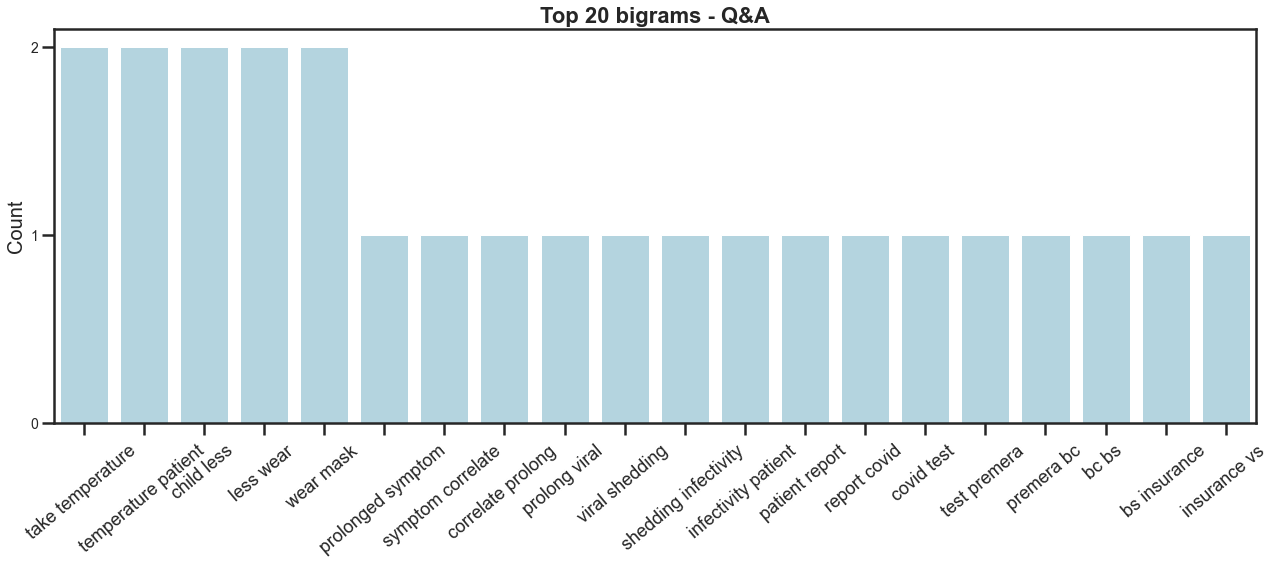

In [145]:
# import matplotlib.style as style
# style.available
# style.use('Solarize_Light2')

bigrams = nltk.bigrams(words)

df_bigrams = get_bigrams(bigrams, 10)
df_bigrams
top_tri = df_bigrams.iloc[:10,:]
info = {'data': df_bigrams, 'x': 'Grams', 'y': 'Count',
       'xlab': '', 'ylab': 'Count', 'pal':'lightblue',
       'title': 'Top 20 bigrams - Q&A',
       'fname': graphq+'_bigrams.png',
       'angle': 40}
plot_frequency_chart(info)

In [146]:
top_grams=[]
top_bi = df_bigrams.iloc[:12,:]
# top_tri
top_bi_list=(list(top_bi['Grams']))
for i in top_bi_list:
    top_grams.append(i)
top_grams 

['take temperature ',
 'temperature patient ',
 'child less ',
 'less wear ',
 'wear mask ',
 'prolonged symptom ',
 'symptom correlate ',
 'correlate prolong ',
 'prolong viral ',
 'viral shedding ',
 'shedding infectivity ',
 'infectivity patient ']

In [147]:
unigrams = Counter(words).most_common(15)
for i in range(6):
    top_grams.append(unigrams[i][0])


In [148]:
unigrams

[('covid', 4),
 ('less', 4),
 ('mask', 4),
 ('patient', 3),
 ('test', 3),
 ('airborne', 3),
 ('get', 3),
 ('symptom', 2),
 ('viral', 2),
 ('increase', 2),
 ('take', 2),
 ('temperature', 2),
 ('clinic', 2),
 ('cdc', 2),
 ('child', 2)]

In [149]:
top_grams

['take temperature ',
 'temperature patient ',
 'child less ',
 'less wear ',
 'wear mask ',
 'prolonged symptom ',
 'symptom correlate ',
 'correlate prolong ',
 'prolong viral ',
 'viral shedding ',
 'shedding infectivity ',
 'infectivity patient ',
 'covid',
 'less',
 'mask',
 'patient',
 'test',
 'airborne']

In [150]:
# f=open(data/clean/dataq_questions_key,'w') 
f=open('data/clean/2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_chat_questions_key.txt' ,'w')
for ele in top_grams:
    f.write('#'+ele+' ')

f.close()

# Literature

In [151]:
import re

blogs=[]
for t in text_list:
    res=re.findall(r'(https?://\S+)', t)
    if bool(res)==True:
        if 'unm.edu' not in res[0]:
            if 'covid19_office_hours' not in res[0]:
                if 'youtube.com' not in res[0]:
                    if 'doi' not in res[0]:
                        print(res[0])
                        blogs.append(res[0])
                
        
len(blogs)

https://www.cdc.gov/coronavirus/2019-ncov/prevent-getting-sick/how-covid-spreads.html
https://www.scientificamerican.com/article/covid-19-is-now-the-third-leading-cause-of-death-in-the-u-s1/
https://uhfnyc.org/publications/publication/covid-19-ripple-effect-impact-covid-19-children-new-york-state/
https://webnew.ped.state.nm.us/wp-content/uploads/2020/09/NMPED_COVID19ResponseToolkit_ELEMpublic.pdf
https://services.aap.org/en/pages/2019-novel-coronavirus-covid-19-infections/clinical-guidance/covid-19-testing-guidance/
https://medium.com/@robinschoenthaler/covid-myth-busting-b5b26b22970f
https://www.theatlantic.com/ideas/archive/2020/10/schools-arent-superspreaders/616669/
https://www.politico.com/news/magazine/2020/09/25/how-covid-19-pandemic-ends-421122
https://www.epa.gov/coronavirus/air-cleaners-hvac-filters-and-coronavirus-covid-19
http://blog.jetblue.com/category/archives/coronavirus/
https://www.fda.gov/medical-devices/coronavirus-covid-19-and-medical-devices/uv-lights-and-lamps-u

12

In [152]:
articles=[]
for t in text_list:
    res=re.findall(r'(https?://\S+)', t)
    if bool(res)==True:
        if 'unm.edu' not in res[0]:
            if 'covid19_office_hours' not in res[0]:
                if 'youtube.com' not in res[0]:
                    if 'doi' in res[0]:
                        print(res[0])
                        articles.append(res[0])
                
        
len(articles)

https://doi.org/10.1056/NEJMoa2028436
https://doi.org/10.1001/jamainternmed.2020.6319
https://doi.org/10.1016/j.cmi.2020.09.052
https://doi.org/10.1056/NEJMoa2007764
http://dx.doi.org/10.15585/mmwr.mm6940e3
https://doi.org/10.1001/jama.2020.15139
https://doi.org/10.1186/s12985-020-01418-7


7

## Summary of blog posts

In [153]:
import pandas as pd
import newspaper
from newspaper import Article
from newspaper import fulltext
import requests
from gensim.summarization import summarize
from gensim.summarization import keywords
from docx import Document
from docx.text.paragraph import Paragraph

In [154]:
import docx

doc = docx.Document()
doc.save('data/clean/2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_blogs.docx')

for link in blogs:
    try:
        # Pass link into article 
        article = Article(link)

        # Call the download and parse methods to download information 
        article.download()
        article.parse()
        html = requests.get(link).text

        # Grab article's body
        body = fulltext(html)

        # Grab article's info
        title=article.title
        date = article.publish_date

        # Run nlp method to extract the keywords and summary of the article
        article.nlp()

        # Split into sentences and remove empty spaces
        text=(body)
        sentences=text.split('\n')
        while('' in sentences) : 
            sentences.remove('') 

        # Create a single string
        article_string = ' '.join(sentences)

        # Summarize with Gensim
        if len(article_string)<4000:
            summary = summarize(article_string, word_count=200) # use wordcount if article is too short
        else:
            summary = summarize(article_string, ratio=0.10) # otherwise the output will include 5% of the total number of words
        summary_length = summary.split('.')

        # Get keywords
        key= keywords(article_string, lemmatize=True, words=10).split('\n')

        # Print to Word
        doc = Document('data/clean/2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_blogs.docx')
        doc.add_heading(f'{title}', 1)
    #     doc.add_heading(f'Date: {date.month}/{date.day}/{date.year}', 6)
        paraKey = doc.add_heading('Keywords: ', 7)
        i=0
        while i<6:
            paraKey.add_run(key[i] + ', ') 
            i+=1
        paraKey.add_run(key[6] + '.')
        doc.add_heading(f'Source: {link}', 6)
    #     doc.add_heading(f'Length of original article: {len(sentences)} ; length of summary: {len(summary_length)}', 6)
        doc.add_heading(f'Summary:',6)
        doc.add_paragraph(summary)
        doc.add_page_break() 
        doc.save('data/clean/2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_blogs.docx')
    except Exception as e:
        print(e)
        


Article `download()` failed with HTTPSConnectionPool(host='webnew.ped.state.nm.us', port=443): Max retries exceeded with url: /wp-content/uploads/2020/09/NMPED_COVID19ResponseToolkit_ELEMpublic.pdf (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7fbcc7e1c150>, 'Connection to webnew.ped.state.nm.us timed out. (connect timeout=7)')) on URL https://webnew.ped.state.nm.us/wp-content/uploads/2020/09/NMPED_COVID19ResponseToolkit_ELEMpublic.pdf


In [155]:
# from docx2pdf import convert
# convert("data/clean/2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_blogs.docx", 
#         "data/clean/2020-10-12 12.03.10 Office Hours NM COVID-19 659261463_blogs.pdf")